In [16]:
import pandas as pd
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy
from scikits import bootstrap as boot
sns.set(font_scale=1.0)
from pandas.plotting import table
import custom_image_toolkit as c
from scipy.stats import ttest_ind

In [17]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload 2

In [2]:
# expt_id2 = '/181917_yFB79_60X_Raff_125uMGal'
# temp= pd.read_pickle("./expt_ids"+expt_id2+".pickle")
# expt_id2 = '/190417_yFB79_60X_Raff_125uMGal'
# temp['expt_id']=expt_id2
# pickle_out = open('./expt_ids'+expt_id2+".pickle","wb")
# pickle.dump(temp, pickle_out)
# pickle_out.close()

In [4]:
# pACT1-mKate2 experiment on 180910
# expt_id = '/180910_yFB71'
# # pACT1-mCherry experiment on 181114
# expt_id0 = '/181114_yFB78_Raff_125Gal'
# df0 = pd.read_pickle("./expt_ids"+expt_id0+".pkl")
# df0['expt'] = expt_id0
# df0['label'] = 'pGAL1-WHI5 11/14'
# df0['genotype'] = 'pGAL1-WHI5'

# # yFB79 Raffinose experiment on 181207
expt_id1 = '/181207_yFB79_60X_Raff_125uMGal'
df1 = pd.read_pickle("./expt_ids"+expt_id1+".pkl")
df1['expt'] = expt_id1
df1['label'] = 'pWHI5-WHI5 12/07'
df1['genotype'] = 'pWHI5-WHI5'
# yFB79 Raffinose experiment on 190417
expt_id2 = '/190417_yFB79_60X_Raff_125uMGal'
df2= pd.read_pickle("./expt_ids"+expt_id2+".pkl")
df2['expt'] = '/190417_yFB79_60X_Raff_125uMGal'
df2['label'] = 'pWHI5-WHI5 4/17'
df2['genotype'] = 'pWHI5-WHI5'
# yFB78 raffinose on 190606
expt_id0 = '/190606_yFB78_60X_Raff_125uMGal'
df0 = pd.read_pickle("./expt_ids"+expt_id0+".pkl")
df0['expt'] = expt_id0
df0['label'] = 'pGAL1-WHI5 06/06'
df0['genotype'] = 'pGAL1-WHI5'
# yFB78 expt 190607
expt_id3 = '/190607_yFB78_60X_Raff_125uMGal'
df3= pd.read_pickle("./expt_ids"+expt_id3+".pkl")
df3['expt'] = '/190607_yFB78_60X_Raff_125uMGal'
df3['label'] = 'pGAL1-WHI5 6/07'
df3['genotype'] = 'pGAL1-WHI5'
# yFB78 expt 190725
expt_id4 = '/190725_yFB78_60X_2Raff_125uMGal'
df4= pd.read_pickle("./expt_ids"+expt_id4+".pkl")
df4['expt'] = expt_id4
df4['label'] = 'pGAL1-WHI5 7/25'
df4['genotype'] = 'pGAL1-WHI5'

# # yFB77 Raffinose experiment on 181220
# expt_id4 = '/181220_yFB77_60X_Raff_125uMGal'
# df4= pd.read_pickle("./expt_ids"+expt_id4+".pkl")
# df4['expt'] = '/181220_yFB77_60X_Raff_125uMGal'
# df4['label'] = 'pGAL1-WHI5 12/20'
# print df.describe()
df0=c.processing(df0)
df1=c.processing(df1)
df=df0.append(df1);
df2=c.processing(df2)
df=df.append(df2);
df3=c.processing(df3)
df=df.append(df3);
df4=c.processing(df4)
df=df.append(df4);
# df4=processing(df4)
# df=df.append(df4);
df = c.normalize(df);

In [5]:
print len(df)

2624


In [151]:
x=df.label=='pGAL1-WHI5 6/07'
y=df.type=='D'
df[x&y].describe()

,$t_{G1}$,$t_{b}$,$t_{budded}$,"$V_{b,ell}$","$V_{b,seg}$","$V_{s,ell}$","$V_{s,seg}$","$V_{d,ell}$","$V_{d,seg}$","$V_{bud,ell}$",...,"$F2_{b,seg,norm}$","$F1_{b,seg,norm}$","$F2_{s,seg,norm}$","$F1_{s,seg,norm}$","$F1_{div,seg,norm}$","$F2_{div,seg,norm}$","$V_{div,seg,norm}$","$\Delta V_{budded,norm}$","$V_{b,seg,norm}$","$V_{s,seg,norm}$"
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,134.863636,255.818182,105.954545,28.214120,45.953781,58.908140,83.103775,66.061416,40.466229,26.387838,...,0.583226,0.642163,0.969306,0.829905,1.296628,1.381235,0.999619,-0.026819,0.567588,1.026437
std,64.172036,98.695695,27.244280,9.530505,15.035423,15.632979,19.205798,15.739748,9.567240,6.800401,...,0.202409,0.292973,0.239315,0.356282,0.482794,0.333986,0.236335,0.201740,0.185707,0.237216
min,24.000000,36.000000,36.000000,10.569235,16.367954,25.378817,38.574478,41.106744,22.955058,12.537266,...,0.177080,0.194411,0.549986,0.262926,0.479444,0.830749,0.567048,-0.616973,0.202165,0.476444
25%,96.000000,180.000000,96.000000,22.761999,36.927702,46.952662,67.779799,53.345746,34.320307,21.072679,...,0.472281,0.438555,0.779413,0.541933,0.963789,1.129664,0.847799,-0.136523,0.456104,0.837167
50%,132.000000,264.000000,102.000000,26.810086,44.537803,57.607193,80.068240,64.144036,38.324966,25.678909,...,0.548774,0.569519,0.914829,0.733815,1.165734,1.315261,0.946724,-0.012019,0.550099,0.988945
75%,168.000000,324.000000,108.000000,31.431911,50.800541,69.464007,97.658801,78.432134,44.762363,30.564661,...,0.659897,0.766787,1.135324,1.004473,1.582486,1.602068,1.105744,0.098309,0.627451,1.206210
max,396.000000,492.000000,264.000000,73.990257,128.099204,95.146781,134.985721,103.108745,70.112731,46.224921,...,1.571324,1.589182,1.686191,2.223805,2.684096,2.506174,1.731963,0.721754,1.582188,1.667245


In [5]:
# expt_id3 = '/190607_yFB78_60X_Raff_125uMGal'
# df3= pd.read_pickle("./expt_ids"+expt_id3+".pkl")
# df3['expt'] = '/190607_yFB78_60X_Raff_125uMGal'
# df3['label'] = 'pGAL1-WHI5 6/07'
# df3['genotype'] = 'pGAL1-WHI5'
# df3=processing(df3)
# df=df3;

In [6]:
df.head()

,type,$t_{G1}$,$t_{b}$,$t_{budded}$,"$V_{b,ell}$","$V_{b,seg}$","$V_{s,ell}$","$V_{s,seg}$","$V_{d,ell}$","$V_{d,seg}$",...,"$F2_{b,seg,norm}$","$F1_{b,seg,norm}$","$F2_{s,seg,norm}$","$F1_{s,seg,norm}$","$F1_{div,seg,norm}$","$F2_{div,seg,norm}$","$V_{div,seg,norm}$","$\Delta V_{budded,norm}$","$V_{b,seg,norm}$","$V_{s,seg,norm}$"
0,M,80.0,170.0,90.0,71.097915,109.934767,89.081051,163.479935,92.414136,71.759507,...,1.477362,4.043253,2.491409,6.013419,6.233107,3.022434,1.772642,-0.246543,1.357834,2.019185
1,M,40.0,330.0,90.0,92.414136,155.196153,102.764785,167.272510,107.069659,64.174358,...,2.015412,3.981633,2.199768,3.360658,3.253756,2.543094,1.585270,-0.480758,1.916870,2.066028
2,M,10.0,450.0,90.0,107.069659,151.154067,110.498511,152.750940,111.686044,74.304525,...,1.760928,2.003347,1.809392,1.997380,3.152358,2.583841,1.835511,-0.051158,1.866945,1.886668
3,M,30.0,120.0,110.0,61.665176,108.437698,62.247227,102.050204,61.680507,55.341651,...,1.475177,1.580177,1.304063,1.896818,3.559232,2.239486,1.367080,0.106630,1.339343,1.260450
4,M,20.0,250.0,100.0,61.680507,112.679393,70.133070,124.156922,79.388475,48.055915,...,1.466576,2.153172,1.711395,2.217300,2.895963,2.189466,1.187103,-0.346393,1.391734,1.533496


In [7]:
df.columns

Index([u'type', u'$t_{G1}$', u'$t_{b}$', u'$t_{budded}$', u'$V_{b,ell}$',
       u'$V_{b,seg}$', u'$V_{s,ell}$', u'$V_{s,seg}$', u'$V_{d,ell}$',
       u'$V_{d,seg}$', u'$V_{bud,ell}$', u'$V_{bud,seg}$', u'$F1_{b,zproj}$',
       u'$F1_{b,seg}$', u'$F1_{s,zproj}$', u'$F1_{s,seg}$', u'$F1_{d,zproj}$',
       u'$F1_{d,seg}$', u'$F1_{bud,zproj}$', u'$F1_{bud,seg}$',
       u'$F2_{b,zproj}$', u'$F2_{b,seg}$', u'$F2_{s,zproj}$', u'$F2_{s,seg}$',
       u'$F2_{d,zproj}$', u'$F2_{d,seg}$', u'$F2_{bud,zproj}$',
       u'$F2_{bud,seg}$', u'$F1_{b,nuc}$', u'$c1_{b,nuc}$', u'$F2_{b,nuc}$',
       u'$c2_{b,nuc}$', u'$V_{b,nuc}$', u'expt', u'label', u'genotype',
       u'$c2_{b,seg}$', u'$c2_{b,ell}$', u'$c2_{s,seg}$', u'$c2_{s,ell}$',
       u'$c1_{b,seg}$', u'$c1_{b,ell}$', u'$c1_{s,seg}$', u'$c1_{s,ell}$',
       u'$F2_{k,b,seg}$', u'$F1_{k,b,seg}$', u'$F2_{k,b,zproj}$',
       u'$F1_{k,b,zproj}$', u'$V_{div,seg}$', u'$\Delta V_{budded}$',
       u'$F1_{div,seg}$', u'$F2_{div,seg}$', u'$c1_{div,

In [8]:
df['expt'].unique()

array(['/190606_yFB78_60X_Raff_125uMGal',
       '/181207_yFB79_60X_Raff_125uMGal',
       '/190417_yFB79_60X_Raff_125uMGal',
       '/190607_yFB78_60X_Raff_125uMGal',
       '/190725_yFB78_60X_2Raff_125uMGal'], dtype=object)

In [9]:
df.columns

Index([u'type', u'$t_{G1}$', u'$t_{b}$', u'$t_{budded}$', u'$V_{b,ell}$',
       u'$V_{b,seg}$', u'$V_{s,ell}$', u'$V_{s,seg}$', u'$V_{d,ell}$',
       u'$V_{d,seg}$', u'$V_{bud,ell}$', u'$V_{bud,seg}$', u'$F1_{b,zproj}$',
       u'$F1_{b,seg}$', u'$F1_{s,zproj}$', u'$F1_{s,seg}$', u'$F1_{d,zproj}$',
       u'$F1_{d,seg}$', u'$F1_{bud,zproj}$', u'$F1_{bud,seg}$',
       u'$F2_{b,zproj}$', u'$F2_{b,seg}$', u'$F2_{s,zproj}$', u'$F2_{s,seg}$',
       u'$F2_{d,zproj}$', u'$F2_{d,seg}$', u'$F2_{bud,zproj}$',
       u'$F2_{bud,seg}$', u'$F1_{b,nuc}$', u'$c1_{b,nuc}$', u'$F2_{b,nuc}$',
       u'$c2_{b,nuc}$', u'$V_{b,nuc}$', u'expt', u'label', u'genotype',
       u'$c2_{b,seg}$', u'$c2_{b,ell}$', u'$c2_{s,seg}$', u'$c2_{s,ell}$',
       u'$c1_{b,seg}$', u'$c1_{b,ell}$', u'$c1_{s,seg}$', u'$c1_{s,ell}$',
       u'$F2_{k,b,seg}$', u'$F1_{k,b,seg}$', u'$F2_{k,b,zproj}$',
       u'$F1_{k,b,zproj}$', u'$V_{div,seg}$', u'$\Delta V_{budded}$',
       u'$F1_{div,seg}$', u'$F2_{div,seg}$', u'$c1_{div,

/home/felix/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


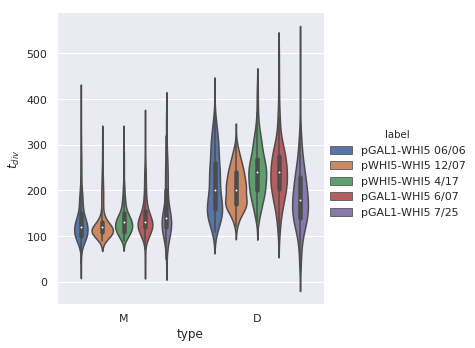

In [10]:
sns.set(font_scale=1.0)
sns_plot=sns.catplot(x="type", y="$t_{div}$", hue="label", kind="violin", data=df,figsize=[5,10])
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c1s_dist.png')
# fig.savefig()

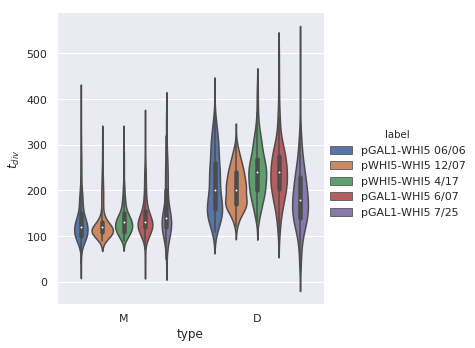

In [11]:
sns.set(font_scale=1.0)
sns_plot=sns.catplot(x="type", y="$t_{div}$", hue="label", kind="violin", data=df,figsize=[5,10])
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c1s_dist.png')
# fig.savefig()

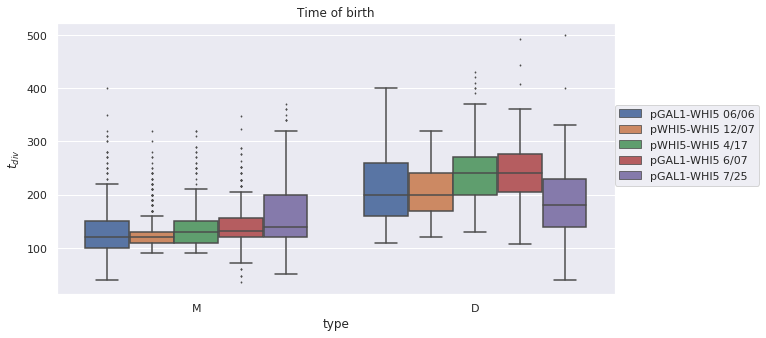

In [12]:
sns.set(font_scale=1.0)
fig=plt.figure(figsize=[10,5])
sns_plot=sns.boxplot(x="type", y="$t_{div}$", hue="label", data=df,showfliers=True,fliersize=1.0)
plt.title('Time of birth')
plt.legend(loc=[1.0,0.4])
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/microscopy_validation/tdiv.png',bbox_inches='tight', dpi=500)

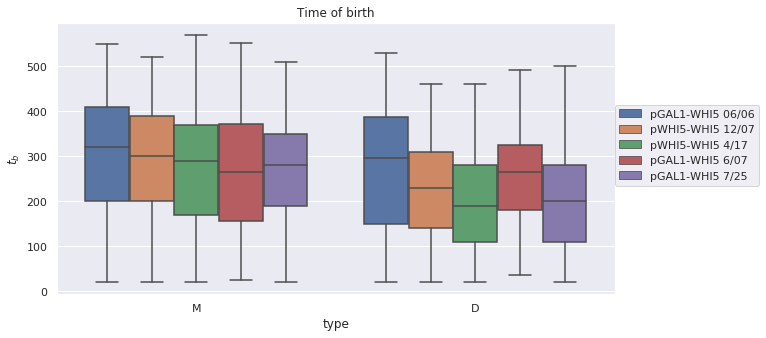

In [13]:
sns.set(font_scale=1.0)
fig=plt.figure(figsize=[10,5])
sns_plot=sns.boxplot(x="type", y="$t_{b}$", hue="label", data=df,showfliers=True,fliersize=1.0)
plt.title('Time of birth')
plt.legend(loc=[1.0,0.4])
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/microscopy_validation/time_of_birth.png',bbox_inches='tight', dpi=500)

# Fluorophore concentration measurements

<Figure size 432x288 with 0 Axes>

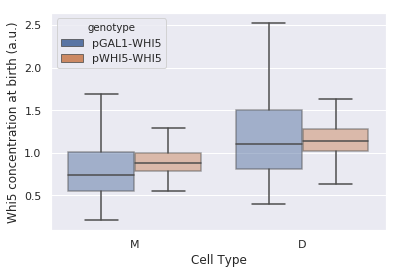

<Figure size 432x288 with 0 Axes>

In [127]:
plt.clf()
fig=plt.figure()
sns.set(font_scale=1.0)
sns_plot=sns.boxplot(x="type", y="$c1_{b,seg,norm}$", hue='genotype', data=df, boxprops=dict(alpha=.5),showfliers=False)
plt.ylabel('Whi5 concentration at birth (a.u.)')
plt.xlabel('Cell Type')
# plt.legend(boxprops=dict(alpha=.5))
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1b_dist_timelapse_compressed.png',bbox_inches='tight', dpi=500)
plt.show()
plt.clf()

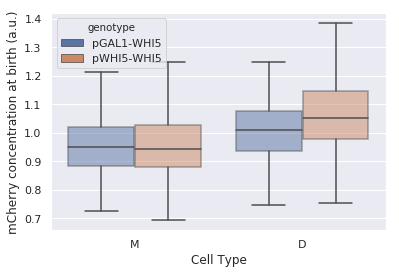

<Figure size 432x288 with 0 Axes>

In [128]:
fig=plt.figure()
sns.set(font_scale=1.0)
sns_plot=sns.boxplot(x="type", y="$c2_{b,seg,norm}$", hue='genotype', data=df, boxprops=dict(alpha=.5),showfliers=False)
plt.ylabel('mCherry concentration at birth (a.u.)')
plt.xlabel('Cell Type')
# plt.legend(boxprops=dict(alpha=.5))
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2b_dist_timelapse_compressed.png',bbox_inches='tight', dpi=500)
plt.show()
plt.clf()

# Cell volume measurements

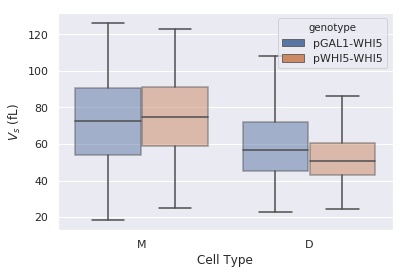

<Figure size 432x288 with 0 Axes>

In [185]:
fig=plt.figure()
sns_plot=sns.boxplot(x="type", y="$V_{s,ell}$", hue="genotype", data=df,showfliers=False, boxprops=dict(alpha=.5))
plt.ylabel('$V_{s}$ (fL)')
plt.xlabel('Cell Type')
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/Vs_dist_timelapse.png')
plt.clf()

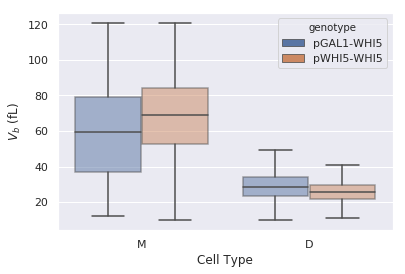

<Figure size 432x288 with 0 Axes>

In [183]:
fig=plt.figure()
sns_plot=sns.boxplot(x="type", y="$V_{b,ell}$", hue="genotype", data=df,showfliers=False, boxprops=dict(alpha=.5))
plt.ylabel('$V_{b}$ (fL)')
plt.xlabel('Cell Type')
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/Vb_dist_timelapse.png')
plt.clf()

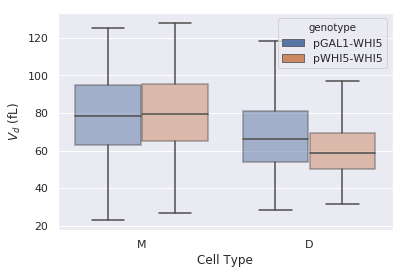

<Figure size 432x288 with 0 Axes>

In [184]:
fig=plt.figure()
sns_plot=sns.boxplot(x="type", y="$V_{d,ell}$", hue="genotype", data=df,showfliers=False, boxprops=dict(alpha=.5))
plt.ylabel('$V_{d}$ (fL)')
plt.xlabel('Cell Type')
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/Vd_dist_timelapse.png')
plt.clf()

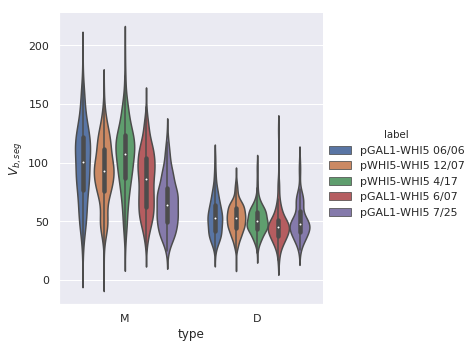

In [168]:
sns_plot=sns.catplot(x="type", y="$V_{b,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vb_dist.png')

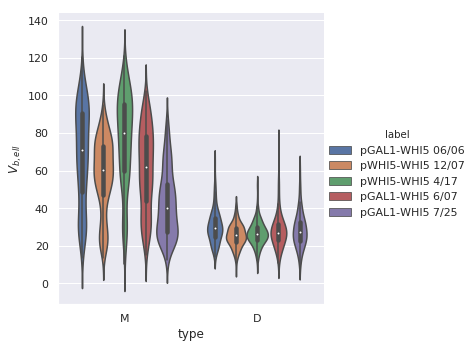

In [19]:
sns_plot=sns.catplot(x="type", y="$V_{b,ell}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vb_dist_ell.png')

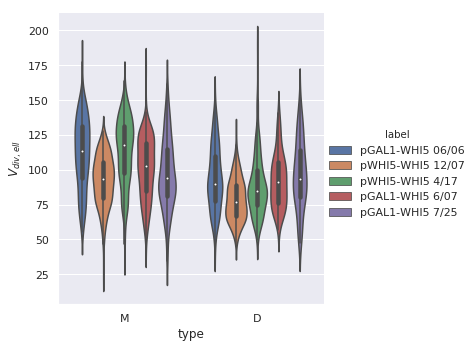

In [20]:
sns_plot=sns.catplot(x="type", y="$V_{div,ell}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vd_dist_ell.png')

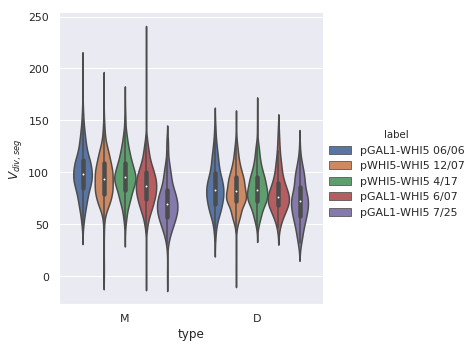

In [21]:
sns_plot=sns.catplot(x="type", y="$V_{div,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vd_dist.png')

<Figure size 1080x1080 with 0 Axes>

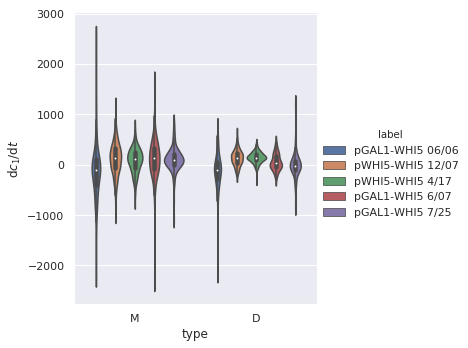

In [22]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1.0)
sns_plot=sns.catplot(x="type", y='$\mathrm{d}c_1/\mathrm{d}t$', hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/dc1dt_dist_timelapse.png',dpi=500)

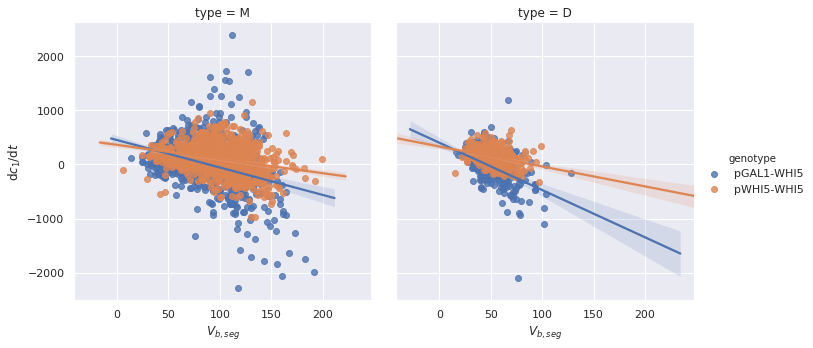

In [23]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$\mathrm{d}c_1/\mathrm{d}t$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/dc1dt_Vb_compressed.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

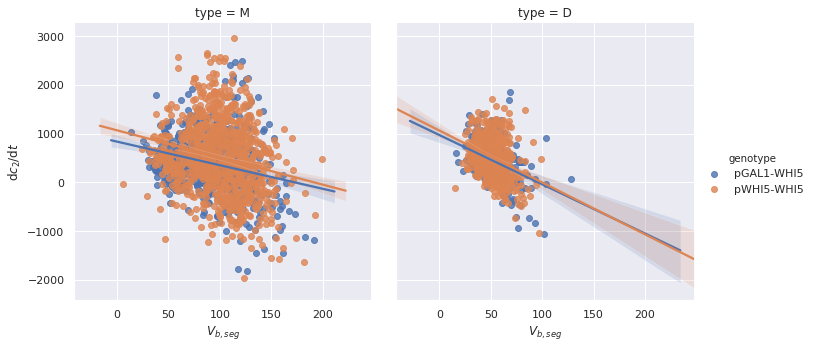

In [24]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$\mathrm{d}c_2/\mathrm{d}t$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/dc2dt_Vb_compressed.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

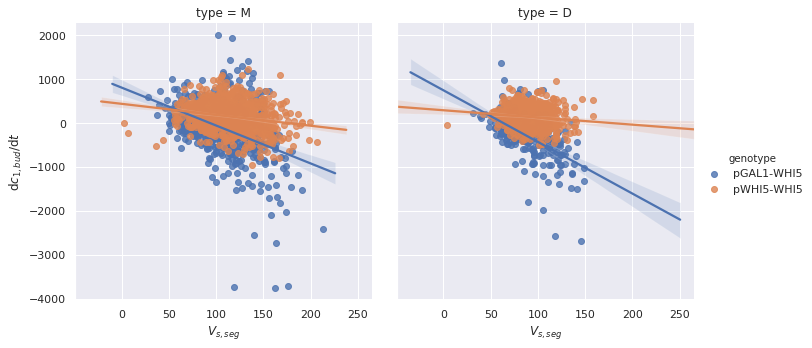

In [25]:
sns_plot=sns.lmplot(x='$V_{s,seg}$',y='$\mathrm{d}c_{1,bud}/\mathrm{d}t$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/dc1buddt_Vb_compressed.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

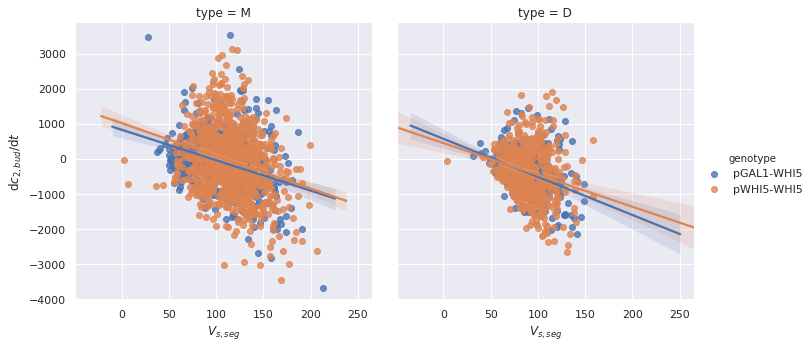

In [26]:
sns_plot=sns.lmplot(x='$V_{s,seg}$',y='$\mathrm{d}c_{2,bud}/\mathrm{d}t$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/dc2buddt_Vb_compressed.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

# Concentration of fluorescence distribution statistics

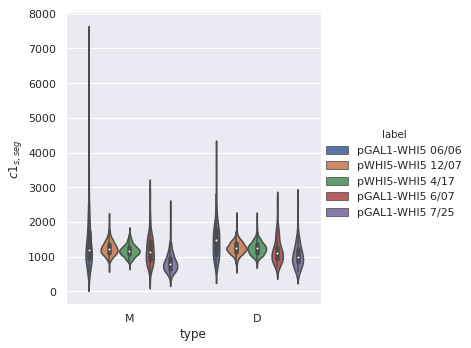

In [24]:
sns_plot=sns.catplot(x="type", y="$c1_{s,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1s_dist_timelapse.png',dpi=500)

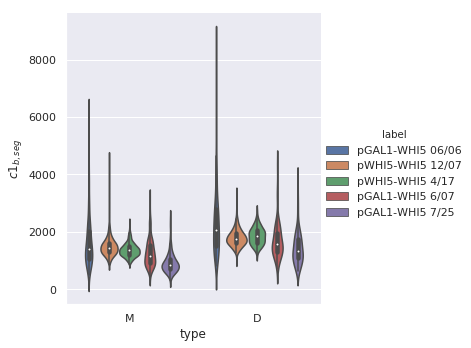

In [25]:
sns_plot=sns.catplot(x="type", y="$c1_{b,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1b_dist_timelapse.png',dpi=500)

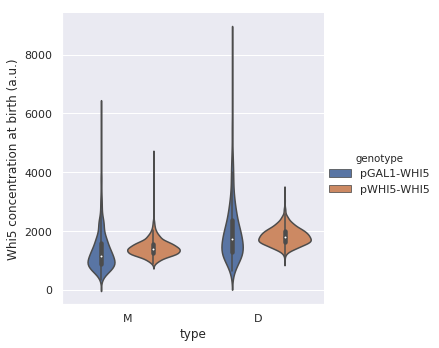

In [26]:
sns_plot=sns.catplot(x="type", y="$c1_{b,seg}$", hue="genotype", kind="violin", data=df)
plt.ylabel('Whi5 concentration at birth (a.u.)')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c1b_dist1_timelapse.png',dpi=500)

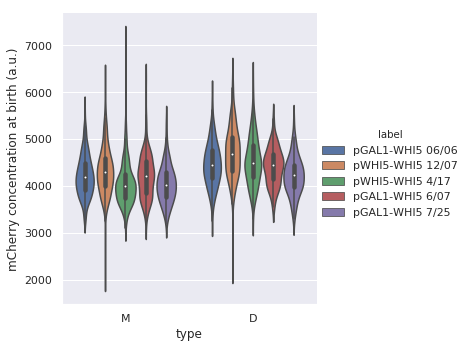

In [27]:
sns_plot=sns.catplot(x="type", y="$c2_{b,seg}$", hue="label", kind="violin", data=df)
plt.ylabel('mCherry concentration at birth (a.u.)')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/induction_validation/c2b_dist1_timelapse.png',dpi=500)

In [28]:
np.around(df.groupby(['type', 'genotype'])['$c1_{b,seg}$'].describe(),0)

count    mean     std     min     25%     50%     75%     max
type genotype                                                                 
D    pGAL1-WHI5  347.0  1976.0  1001.0   627.0  1279.0  1745.0  2372.0  8352.0
     pWHI5-WHI5  559.0  1832.0   302.0  1010.0  1614.0  1801.0  2018.0  3343.0
M    pGAL1-WHI5  800.0  1338.0   693.0   324.0   871.0  1167.0  1598.0  6087.0
     pWHI5-WHI5  918.0  1430.0   286.0   873.0  1246.0  1393.0  1569.0  4585.0

# Size distribution statistics

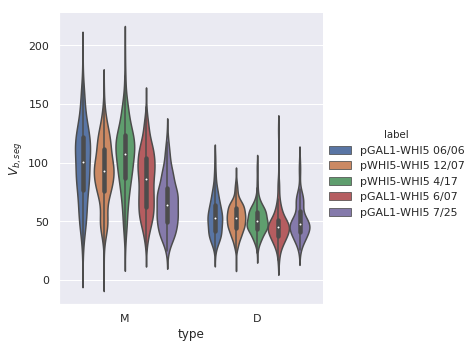

In [29]:
sns_plot=sns.catplot(x="type", y="$V_{b,seg}$", hue='label',kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/vb_dist_comp.png')
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timelapse_birth_volume.png',dpi=500)

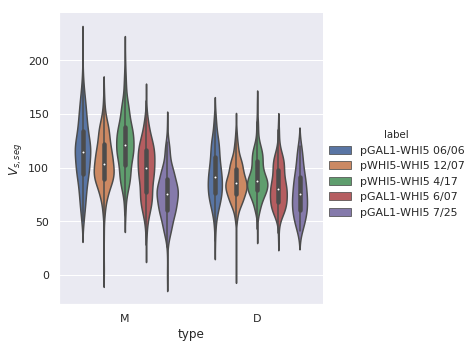

In [30]:
sns_plot=sns.catplot(x="type", y="$V_{s,seg}$", hue='label',kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/vb_dist_comp.png')
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_distribution_perturbation/timelapse_start_volume.png',dpi=500)

In [135]:
aggregate = {'mean':'mean', 'count':'count','CV':lambda x: np.std(x)/np.mean(x), 'standard deviation':'std'}
np.around(df.groupby(['genotype', 'type']).agg({'$V_{b,ell}$':aggregate, '$V_{s,ell}$':aggregate, '$V_{div,ell}$':aggregate}),2)

$V_{b,ell}$                                 $V_{div,ell}$  \
                      count standard deviation    CV   mean         count   
genotype   type                                                             
pGAL1-WHI5 D            347               9.08  0.31  29.35           347   
           M            800              24.75  0.42  59.17           800   
pWHI5-WHI5 D            559               6.21  0.24  26.01           559   
           M            918              24.09  0.36  67.24           918   

                                                 $V_{s,ell}$  \
                standard deviation    CV    mean       count   
genotype   type                                                
pGAL1-WHI5 D                 22.12  0.23   94.33         347   
           M                 24.65  0.24  104.48         800   
pWHI5-WHI5 D                 18.74  0.22   83.30         559   
           M                 23.50  0.23  103.31         918   

                                                 
                standard deviation    CV   mean  
genotype   type                                  
pGAL1-WHI5 D                 18.08  0.30  59.49  
           M                 22.66  0.31  72.10  
pWHI5-WHI5 D                 14.22  0.27  53.07  
           M                 21.31  0.28  75.67

In [31]:
aggregate = {'CV':lambda x: np.std(x)/np.mean(x), 'std dev':'std','median':'median', 'mean':'mean', 'count':'count'}
np.around(df.groupby(['label', 'type']).agg({'$V_{b,seg}$':aggregate, '$V_{s,seg}$':aggregate, '$V_{div,seg}$':aggregate}),2)

/home/felix/anaconda2/lib/python2.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


$V_{div,seg}$                             $V_{s,seg}$  \
                              count std dev median    CV   mean       count   
label            type                                                         
pGAL1-WHI5 06/06 D              178   21.44  82.99  0.25  85.52         178   
                 M              319   23.31  98.11  0.23  99.69         319   
pGAL1-WHI5 6/07  D               88   19.13  76.65  0.24  80.93          88   
                 M              283   21.03  86.73  0.24  87.71         283   
pGAL1-WHI5 7/25  D               81   20.29  72.46  0.28  72.51          81   
                 M              198   20.79  69.26  0.29  71.21         198   
pWHI5-WHI5 12/07 D              301   18.95  82.34  0.22  84.19         301   
                 M              444   22.17  93.77  0.24  93.79         444   
pWHI5-WHI5 4/17  D              258   18.65  83.09  0.22  85.01         258   
                 M              474   20.74  95.41  0.21  96.73         474   

                                                    $V_{b,seg}$          \
                      std dev  median    CV    mean       count std dev   
label            type                                                     
pGAL1-WHI5 06/06 D      23.75   90.82  0.26   92.74         178   16.12   
                 M      30.20  114.38  0.26  114.30         319   32.48   
pGAL1-WHI5 6/07  D      19.21   80.07  0.23   83.10          88   15.04   
                 M      25.12   99.46  0.26   97.52         283   25.83   
pGAL1-WHI5 7/25  D      20.78   75.05  0.27   76.15          81   14.92   
                 M      21.85   75.33  0.29   75.36         198   21.35   
pWHI5-WHI5 12/07 D      17.59   85.53  0.20   87.08         301   12.24   
                 M      23.86  103.22  0.23  105.34         444   26.88   
pWHI5-WHI5 4/17  D      19.56   87.78  0.21   92.02         258   12.17   
                 M      27.01  120.79  0.22  121.21         474   29.34   

                                             
                       median    CV    mean  
label            type                        
pGAL1-WHI5 06/06 D      52.75  0.30   54.21  
                 M     100.45  0.33   98.90  
pGAL1-WHI5 6/07  D      44.54  0.33   45.95  
                 M      85.78  0.31   84.28  
pGAL1-WHI5 7/25  D      47.36  0.29   50.49  
                 M      63.87  0.33   65.39  
pWHI5-WHI5 12/07 D      52.55  0.23   52.23  
                 M      92.87  0.29   91.99  
pWHI5-WHI5 4/17  D      50.28  0.24   51.09  
                 M     107.69  0.28  105.14

In [32]:
np.around(df.groupby(['type', 'genotype']).agg({'$V_{b,seg}$':aggregate}),2)

$V_{b,seg}$                            
                      count std dev median    CV   mean
type genotype                                          
D    pGAL1-WHI5         347   15.90  48.16  0.31  51.24
     pWHI5-WHI5         559   12.21  51.10  0.24  51.71
M    pGAL1-WHI5         800   30.67  84.11  0.36  85.44
     pWHI5-WHI5         918   28.92  99.70  0.29  98.78

In [33]:
x1, x2 = df.genotype=='pWHI5-WHI5', df.genotype=='pGAL1-WHI5'
y1, y2= df.type == 'D', df.type == 'M'
temp_df1 = df[x2&y1].sample(n=len(df[x1&y1]),replace=True)
temp_df2 = df[x2&y2].sample(n=len(df[x1&y2]),replace=True)
temp_df3 = temp_df1.append(temp_df2)
temp_df3 = temp_df3.append(df[x1])
np.around(temp_df3.groupby(['type', 'genotype']).agg({'$V_{b,seg}$':aggregate}),2)

$V_{b,seg}$                            
                      count std dev median    CV   mean
type genotype                                          
D    pGAL1-WHI5         559   15.70  47.81  0.31  50.67
     pWHI5-WHI5         559   12.21  51.10  0.24  51.71
M    pGAL1-WHI5         918   30.66  86.58  0.36  85.64
     pWHI5-WHI5         918   28.92  99.70  0.29  98.78

# Timing distribution statistics

In [6]:
df.label.unique()

array(['pGAL1-WHI5 06/06', 'pWHI5-WHI5 12/07', 'pWHI5-WHI5 4/17',
       'pGAL1-WHI5 6/07', 'pGAL1-WHI5 7/25'], dtype=object)

In [7]:
x1,x2= df.label=='pWHI5-WHI5 12/07', df.label=='pWHI5-WHI5 4/17'
y1, y2= df.type == 'D', df.type == 'M'

var = '$t_{G1}$'
cat1, cat2 = df[x1&y1],df[x2&y1]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Daughters', var,vals
cat1, cat2 = df[x1&y2],df[x2&y2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Mothers',var,vals

var = '$t_{div}$'
cat1, cat2 = df[x1&y1],df[x2&y1]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Daughters', var,vals
cat1, cat2 = df[x1&y2],df[x2&y2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Mothers',var,vals

var = '$t_{budded}$'
cat1, cat2 = df[x1&y1],df[x2&y1]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Daughters', var,vals
cat1, cat2 = df[x1&y2],df[x2&y2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Mothers',var,vals

var = '$t_{div}$'
cat1, cat2 = df[x1],df[x2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Full Popn', var,vals
var = '$t_{G1}$'
cat1, cat2 = df[x1],df[x2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Full Popn', var,vals
var = '$t_{budded}$'
cat1, cat2 = df[x1],df[x2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Full Popn', var,vals

Daughters $t_{G1}$ Ttest_indResult(statistic=-7.114853053907572, pvalue=4.135074873183937e-12)
Mothers $t_{G1}$ Ttest_indResult(statistic=-1.3257195439162004, pvalue=0.18527044869640008)
Daughters $t_{div}$ Ttest_indResult(statistic=-8.263351659814365, pvalue=1.4977677270331978e-15)
Mothers $t_{div}$ Ttest_indResult(statistic=-3.6883651011447807, pvalue=0.00023905016859293506)
Daughters $t_{budded}$ Ttest_indResult(statistic=-5.28037290125048, pvalue=1.8735263316517538e-07)
Mothers $t_{budded}$ Ttest_indResult(statistic=-7.54440559777508, pvalue=1.201875561075406e-13)
Full Popn $t_{div}$ Ttest_indResult(statistic=-4.52387950695483, pvalue=6.582777564022037e-06)
Full Popn $t_{G1}$ Ttest_indResult(statistic=-2.8927393412007283, pvalue=0.0038774085096052726)
Full Popn $t_{budded}$ Ttest_indResult(statistic=-8.587489327865985, pvalue=2.3541304291825762e-17)


In [201]:
x1,x2= df.genotype=='pWHI5-WHI5', df.genotype=='pGAL1-WHI5'
y1, y2= df.type == 'D', df.type == 'M'

var = '$t_{G1}$'
cat1, cat2 = df[x1&y1],df[x2&y1]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Daughters', var,vals
cat1, cat2 = df[x1&y2],df[x2&y2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Mothers',var,vals

var = '$t_{div}$'
cat1, cat2 = df[x1&y1],df[x2&y1]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Daughters', var,vals
cat1, cat2 = df[x1&y2],df[x2&y2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Mothers',var,vals

var = '$t_{budded}$'
cat1, cat2 = df[x1&y1],df[x2&y1]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Daughters', var,vals
cat1, cat2 = df[x1&y2],df[x2&y2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Mothers',var,vals

var = '$t_{div}$'
cat1, cat2 = df[x1],df[x2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Full Popn', var,vals
var = '$t_{G1}$'
cat1, cat2 = df[x1],df[x2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Full Popn', var,vals
var = '$t_{budded}$'
cat1, cat2 = df[x1],df[x2]
vals = ttest_ind(cat1[var],cat2[var], equal_var=False)
print 'Full Popn', var,vals

Daughters $t_{G1}$ Ttest_indResult(statistic=2.4389406167930034, pvalue=0.015021376734449022)
Mothers $t_{G1}$ Ttest_indResult(statistic=0.4862498038916689, pvalue=0.6268548573136954)
Daughters $t_{div}$ Ttest_indResult(statistic=1.6574630864146678, pvalue=0.09796238874423717)
Mothers $t_{div}$ Ttest_indResult(statistic=-5.313763500161364, pvalue=1.2465797316962199e-07)
Daughters $t_{budded}$ Ttest_indResult(statistic=-1.4409403707613375, pvalue=0.15037977877156883)
Mothers $t_{budded}$ Ttest_indResult(statistic=-8.2299861866024, pvalue=6.336147496754788e-16)
Full Popn $t_{div}$ Ttest_indResult(statistic=0.22055830612429872, pvalue=0.8254555042429995)
Full Popn $t_{G1}$ Ttest_indResult(statistic=4.361720423158324, pvalue=1.3438315978198373e-05)
Full Popn $t_{budded}$ Ttest_indResult(statistic=-7.614330066147664, pvalue=5.0092311729344346e-14)


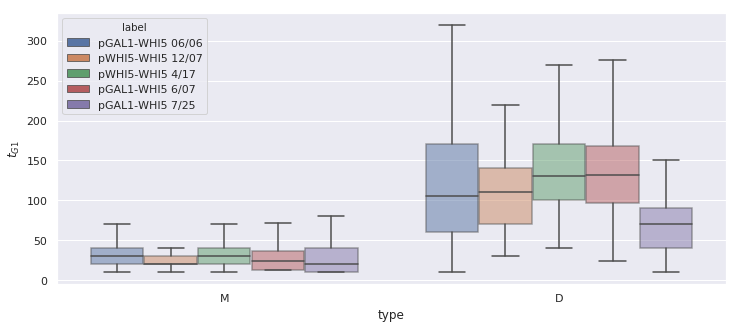

<Figure size 432x288 with 0 Axes>

In [14]:
fig=plt.figure(figsize=[12,5])
sns_plot=sns.boxplot(x="type", y="$t_{G1}$", data=df,hue='label', boxprops=dict(alpha=.5),showfliers=False)
plt.show()
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/timelapse_G1_length.png',dpi=500)
plt.clf()

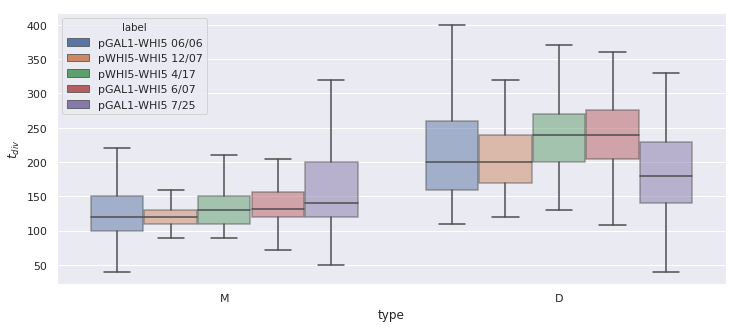

<Figure size 432x288 with 0 Axes>

In [13]:
fig=plt.figure(figsize=[12,5])
sns_plot=sns.boxplot(x="type", y="$t_{div}$", data=df,hue='label', boxprops=dict(alpha=.5),showfliers=False)
plt.show()
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/timelapse_G1_length.png',dpi=500)
plt.clf()

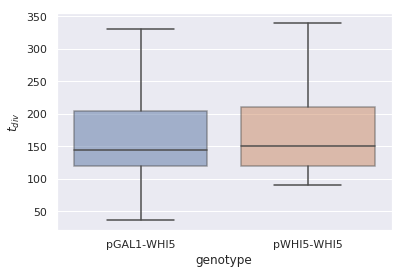

<Figure size 432x288 with 0 Axes>

In [200]:
fig=plt.figure()
sns_plot=sns.boxplot(x="genotype", y="$t_{div}$", data=df, boxprops=dict(alpha=.5),showfliers=False)
plt.show()
# fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/timelapse_G1_length.png',dpi=500)
plt.clf()

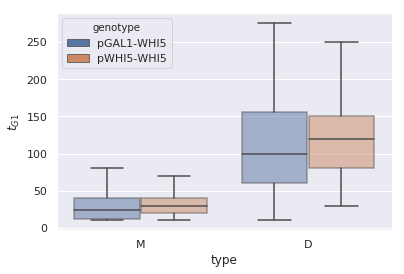

<Figure size 432x288 with 0 Axes>

In [194]:
fig=plt.figure()
sns_plot=sns.boxplot(x="type", y="$t_{G1}$", hue='genotype', data=df, boxprops=dict(alpha=.5),showfliers=False)
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/timelapse_G1_length.png',dpi=500)
plt.clf()

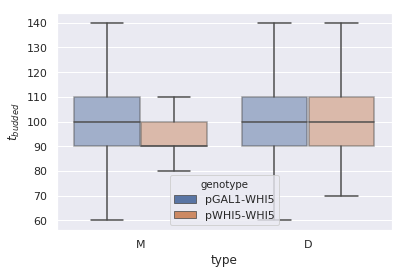

<Figure size 432x288 with 0 Axes>

In [158]:
fig=plt.figure()
sns_plot=sns.boxplot(x="type", y="$t_{budded}$", hue='genotype', data=df, boxprops=dict(alpha=.5),showfliers=False)
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/timelapse_budded_length.png',dpi=500)
plt.clf()

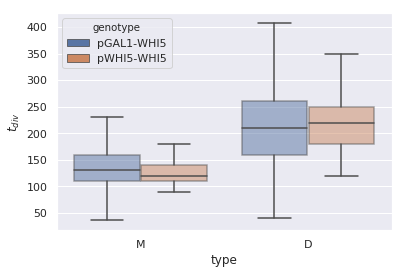

<Figure size 432x288 with 0 Axes>

In [160]:
fig=plt.figure()
sns_plot=sns.boxplot(x="type", y="$t_{div}$", hue='genotype', data=df, boxprops=dict(alpha=.5),showfliers=False)
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/timelapse_div_length.png',dpi=500)
plt.clf()

In [37]:
df.groupby(['type', 'genotype'])['$V_{b,seg}$'].std()/df.groupby(['type', 'genotype'])['$V_{b,seg}$'].mean()

type  genotype  
D     pGAL1-WHI5    0.310340
      pWHI5-WHI5    0.236182
M     pGAL1-WHI5    0.358937
      pWHI5-WHI5    0.292792
Name: $V_{b,seg}$, dtype: float64

In [38]:
df.groupby(['type', 'label'])['$V_{b,seg}$'].std()/df.groupby(['type', 'label'])['$V_{b,seg}$'].mean()

type  label           
D     pGAL1-WHI5 06/06    0.297296
      pGAL1-WHI5 6/07     0.327186
      pGAL1-WHI5 7/25     0.295486
      pWHI5-WHI5 12/07    0.234318
      pWHI5-WHI5 4/17     0.238298
M     pGAL1-WHI5 06/06    0.328440
      pGAL1-WHI5 6/07     0.306487
      pGAL1-WHI5 7/25     0.326572
      pWHI5-WHI5 12/07    0.292246
      pWHI5-WHI5 4/17     0.279069
Name: $V_{b,seg}$, dtype: float64

In [39]:
df.groupby(['type', 'genotype'])['$t_{G1}$'].describe()

count        mean        std   min   25%    50%    75%    max
type genotype                                                                 
D    pGAL1-WHI5  347.0  112.155620  66.246597  10.0  60.0  100.0  156.0  396.0
     pWHI5-WHI5  559.0  122.289803  50.808324  30.0  80.0  120.0  150.0  330.0
M    pGAL1-WHI5  800.0   36.735000  37.174820  10.0  12.0   24.0   40.0  228.0
     pWHI5-WHI5  918.0   37.581699  34.606865  10.0  20.0   30.0   40.0  230.0

In [40]:
df.groupby(['type', 'genotype'])['$V_{b,seg}$'].describe()

count       mean        std        min        25%        50%  \
type genotype                                                                   
D    pGAL1-WHI5  347.0  51.244629  15.903254  16.367954  40.146400  48.155719   
     pWHI5-WHI5  559.0  51.705746  12.211942  15.120397  43.614610  51.099955   
M    pGAL1-WHI5  800.0  85.435295  30.665853  14.022546  60.556441  84.110327   
     pWHI5-WHI5  918.0  98.779211  28.921800   6.088081  80.355179  99.704795   

                        75%         max  
type genotype                            
D    pGAL1-WHI5   59.982565  128.099204  
     pWHI5-WHI5   59.708102   98.457238  
M    pGAL1-WHI5  107.963626  191.225614  
     pWHI5-WHI5  119.403728  199.559298

In [41]:
# data.groupby(
#    ['month', 'item']
# ).agg(
#     {
#          'duration':sum,    # Sum duration per group
#          'network_type': "count",  # get the count of networks
#          'date': 'first'  # get the first date per group
#     }
aggregate = {'CV':lambda x: np.std(x)/np.mean(x), 'std':'std','av':'mean', 'count':'count'}
# del fig
# fig=plt.figure()
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis
df.groupby(['type', 'label']).agg({'$V_{b,seg}$':aggregate, '$V_{s,seg}$':aggregate})

# table(ax,df1)
# plt.savefig('mytable.png')
# df1.to_latex()
# subprocess.call(
#     'wkhtmltoimage -f png --width 0 table.html table.png', shell=True)

$V_{s,seg}$                             $V_{b,seg}$  \
                              std count        CV          av         std   
type label                                                                  
D    pGAL1-WHI5 06/06   23.748641   178  0.255345   92.744546   16.115134   
     pGAL1-WHI5 6/07    19.205798    88  0.229789   83.103775   15.035423   
     pGAL1-WHI5 7/25    20.775621    81  0.271141   76.148445   14.917828   
     pWHI5-WHI5 12/07   17.593495   301  0.201703   87.079845   12.239532   
     pWHI5-WHI5 4/17    19.556312   258  0.212102   92.023710   12.174323   
M    pGAL1-WHI5 06/06   30.199192   319  0.263804  114.296290   32.483700   
     pGAL1-WHI5 6/07    25.121937   283  0.257144   97.523377   25.831535   
     pGAL1-WHI5 7/25    21.851444   198  0.289213   75.363814   21.352939   
     pWHI5-WHI5 12/07   23.863101   444  0.226272  105.342969   26.882862   
     pWHI5-WHI5 4/17    27.012399   474  0.222623  121.208686   29.341690   

                                                   
                      count        CV          av  
type label                                         
D    pGAL1-WHI5 06/06   178  0.296460   54.205673  
     pGAL1-WHI5 6/07     88  0.325321   45.953781  
     pGAL1-WHI5 7/25     81  0.293656   50.485726  
     pWHI5-WHI5 12/07   301  0.233928   52.234777  
     pWHI5-WHI5 4/17    258  0.237836   51.088543  
M    pGAL1-WHI5 06/06   319  0.327925   98.902917  
     pGAL1-WHI5 6/07    283  0.305945   84.282516  
     pGAL1-WHI5 7/25    198  0.325746   65.385119  
     pWHI5-WHI5 12/07   444  0.291917   91.987023  
     pWHI5-WHI5 4/17    474  0.278774  105.141514

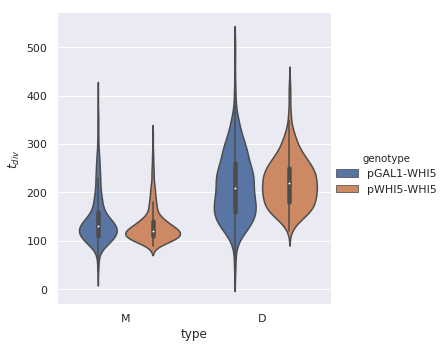

In [42]:

sns_plot=sns.catplot(x="type", y="$t_{div}$", hue='genotype',kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/t_div_dist_comp.png')

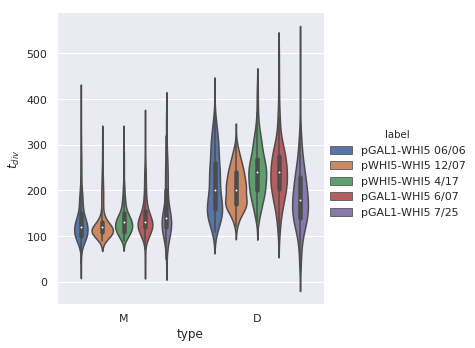

In [43]:

sns_plot=sns.catplot(x="type", y="$t_{div}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/t_div_dist.png')

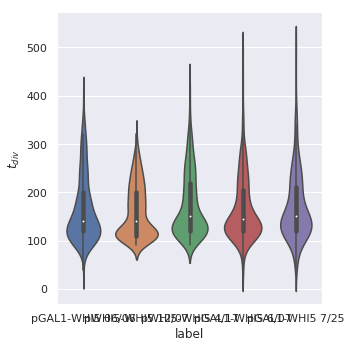

In [44]:
sns_plot=sns.catplot(x="label", y="$t_{div}$", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/t_div_dist_fullpop.png')

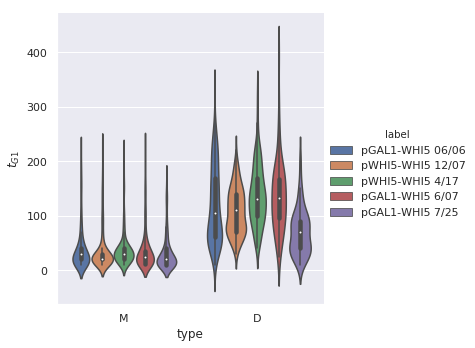

In [45]:
sns_plot=sns.catplot(x="type", y="$t_{G1}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tG1_dist.png')

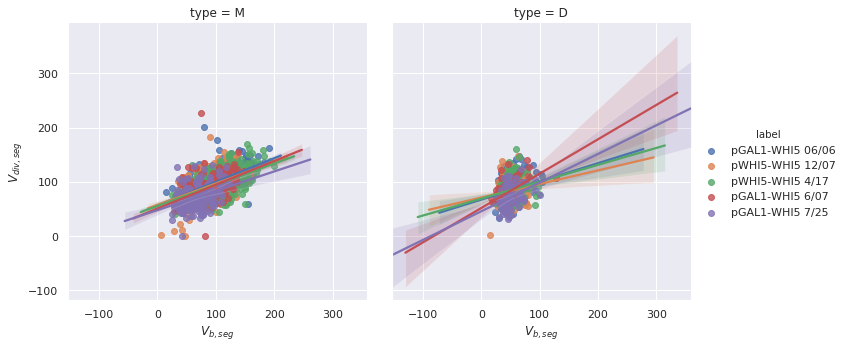

In [46]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$V_{div,seg}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vdiv_Vb.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

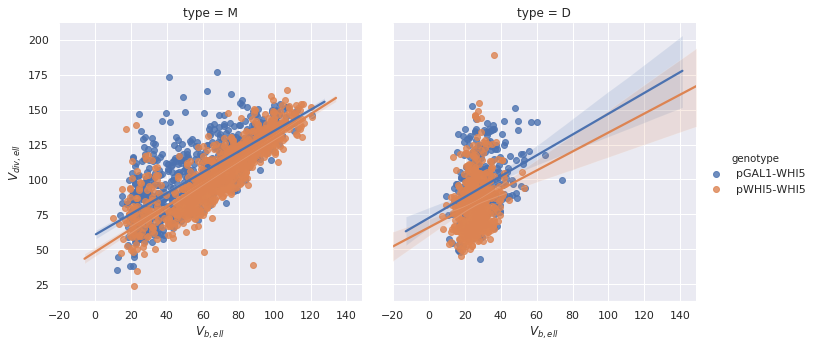

In [202]:
sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$V_{div,ell}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/vd_vb.png',dpi=500,bbox_inches='tight')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

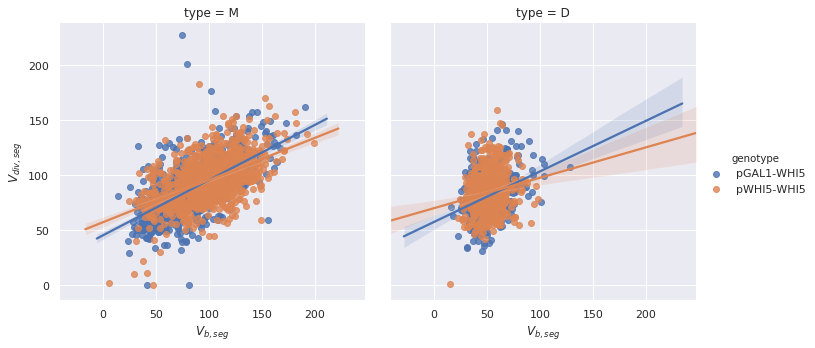

In [48]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$V_{div,seg}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vdiv_Vb_compressed.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

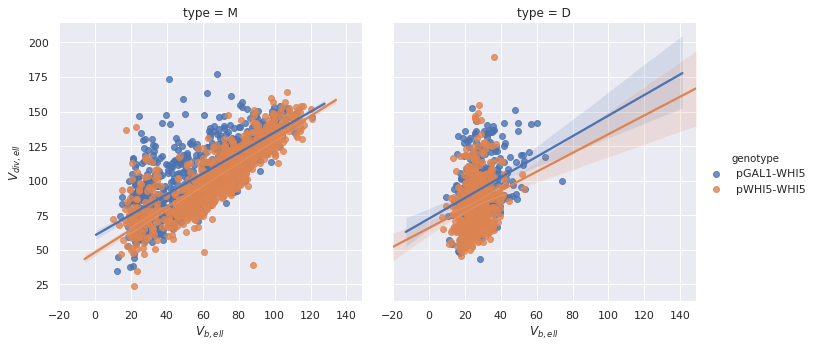

In [49]:
sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$V_{div,ell}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vdiv_Vb_compressed_ell.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [53]:
x=df.type=='D'
y=df.genotype=='pGAL1-WHI5'
vals = []
print len(df[x&y])
for i0 in range(2000):
    temp = df[x & y].sample(frac=1.0, replace=True)
#     print len(temp)
    vals.append(np.mean(temp['$V_{b,seg}$']))
print np.mean(vals), np.sort(vals)[100], np.sort(vals)[1900]

266
51.453169964088126 49.88879261052625 53.163021339473616


In [54]:
boot.ci(df[x&y]['$V_{b,seg}$'], np.mean, alpha=0.05)

array([49.66123062, 53.50089368])

In [55]:
x=df.type=='D'
y=df.genotype=='pGAL1-WHI5'
vals = []
print len(df[x&y])
for i0 in range(1000):
    temp = df[x & y].sample(frac=1.0, replace=True)
#     print len(temp)
    vals.append(scipy.stats.linregress(temp['$V_{b,seg}$'], temp['$V_{div,seg}$'])[0])
print np.mean(vals), np.sort(vals)[50], np.sort(vals)[950]

266
0.43654338857138214 0.32773836582985616 0.5512676252694068


In [56]:
x=df.type=='D'
y=df.genotype=='pGAL1-WHI5'
print scipy.stats.pearsonr(df['$V_{b,seg}$'],df['$V_{div,seg}$'])
z = boot.ci((df[x & y]['$V_{b,seg}$'], df[x & y]['$V_{div,seg}$']), scipy.stats.pearsonr)
print z[0]
print z[1]

(0.5058502960501733, 1.3775419755884712e-152)
[2.33448941e-01 7.39722723e-14]
[4.31960471e-01 8.37185179e-05]


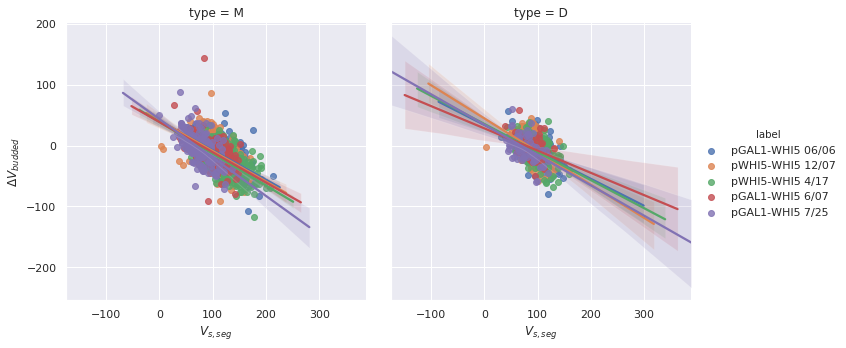

In [50]:
sns_plot=sns.lmplot(x='$V_{s,seg}$',y='$\Delta V_{budded}$', data=df,hue='label', col="type",ci=99)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/dvg2_Vs.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [58]:
types = ['D','M']
labels = ['pGAL1-WHI5', 'pWHI5-WHI5']
x, y = '$V_{b,seg}$', '$V_{div,seg}$'
for ind in range(len(labels)):
    for ind1 in range(len(types)):
        print labels[ind], types[ind1]
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci(df[v1 & v2][[x,y]], scipy.stats.linregress)
        print z[0][0], z[1][0]
        print scipy.stats.linregress(df[v1&v2][[x,y]])[0]

pGAL1-WHI5 D
0.3082661984938287 0.5713024704148603
0.43203489445071763
pGAL1-WHI5 M
0.4095548274424038 0.5009305014420569
0.4572180568637763
pWHI5-WHI5 D
0.14360532107880797 0.4259112074265869
0.2761887717052759
pWHI5-WHI5 M
0.3399475867622655 0.43003435224417336
0.38311522199684056


In [51]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$V_{div,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci(df[v1 & v2][[x,y]], scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([z[0][0]-vals[0][-1], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $V_{div,seg}$
pWHI5-WHI5 4/17 D
0.12921494915554763 0.49009111628877144
pWHI5-WHI5 12/07 D
0.06582904819524503 0.4762121643341722
pWHI5-WHI5 4/17 M
0.3368503303274421 0.4447501599681682
pWHI5-WHI5 12/07 M
0.3216561167114604 0.47495611010719524
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


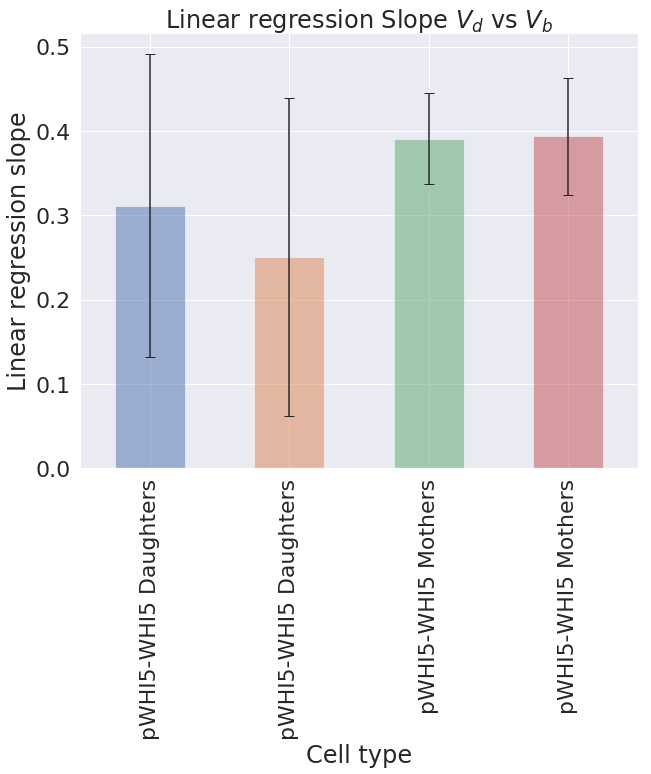

In [60]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression Slope $V_d$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Linear regression slope')
fig=plot.get_figure()
fig.savefig('./plots/Vd_Vb_slope_comp_pWHI5.png',bbox_inches='tight')

$V_{b,ell}$ $c1_{b,seg}$
pGAL1-WHI5 D
-0.11590096927090383 0.07099620349787548
pWHI5-WHI5 D
-0.4457967367438553 -0.3042686547653502
['Perturbed', 'Unperturbed']


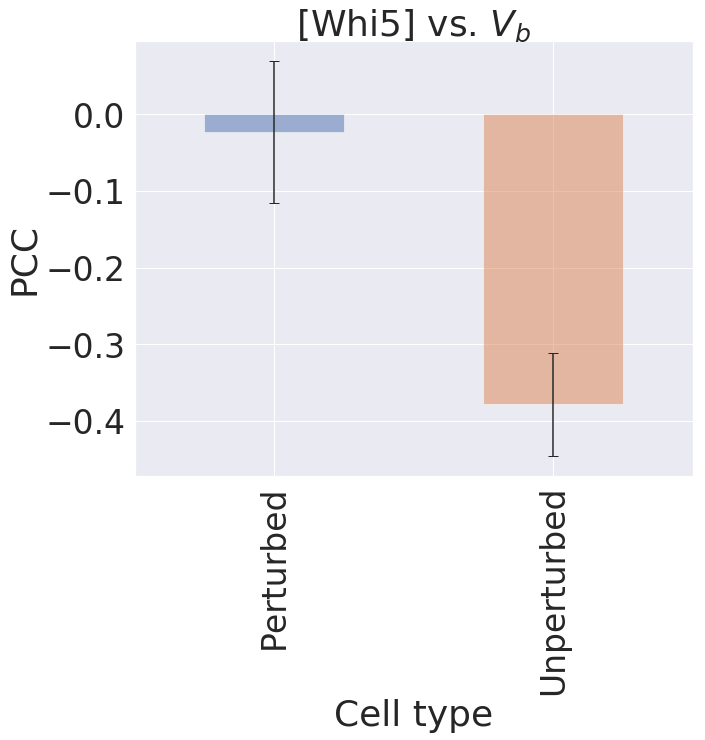

In [47]:
types = ['D']
sns.set(font_scale=3.0)
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = ['Perturbed', 'Unperturbed']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c1_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('[Whi5] vs. $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/c1b_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $c2_{b,seg}$
pGAL1-WHI5 D
-0.030992331505492902 0.18641506302035846
pWHI5-WHI5 D
0.05007829171873194 0.20175733364362283
['Perturbed', 'Unperturbed']


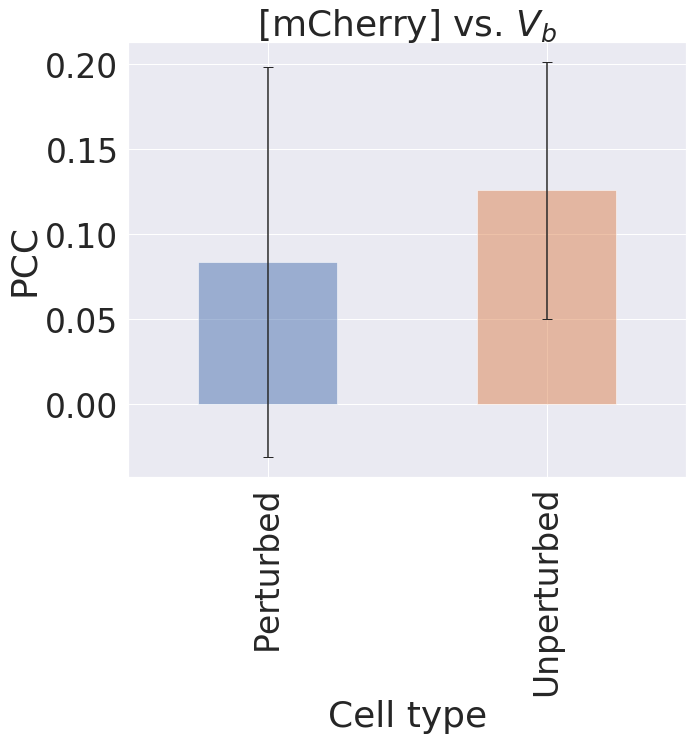

In [48]:
types = ['D']
sns.set(font_scale=3.0)
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
x, y = '$V_{b,ell}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
legends = ['Perturbed', 'Unperturbed']
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('[mCherry] vs. $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/c2b_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $t_{G1}$
pGAL1-WHI5 D
-0.5087802520128868 -0.35585468544244886
pWHI5-WHI5 D
-0.3683923511536986 -0.22247250353799394
['Perturbed', 'Unperturbed']


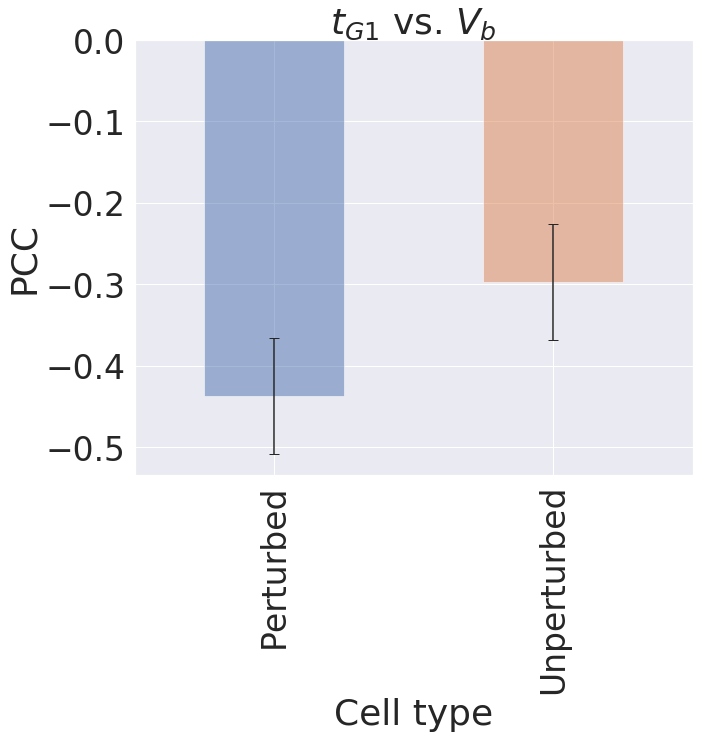

In [49]:
types = ['D']
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
x, y = '$V_{b,ell}$', '$t_{G1}$'
print x,y
vals = [[],[]]
label = []
legends = ['Perturbed', 'Unperturbed']
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label
sns.set(font_scale=3.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('$t_{G1}$ vs. $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{s,ell}$ $t_{budded}$
pGAL1-WHI5 D
-0.2878001969914333 -0.08202202298365838
pWHI5-WHI5 D
-0.15387771293107463 0.027499959390363714
['Perturbed', 'Unperturbed']


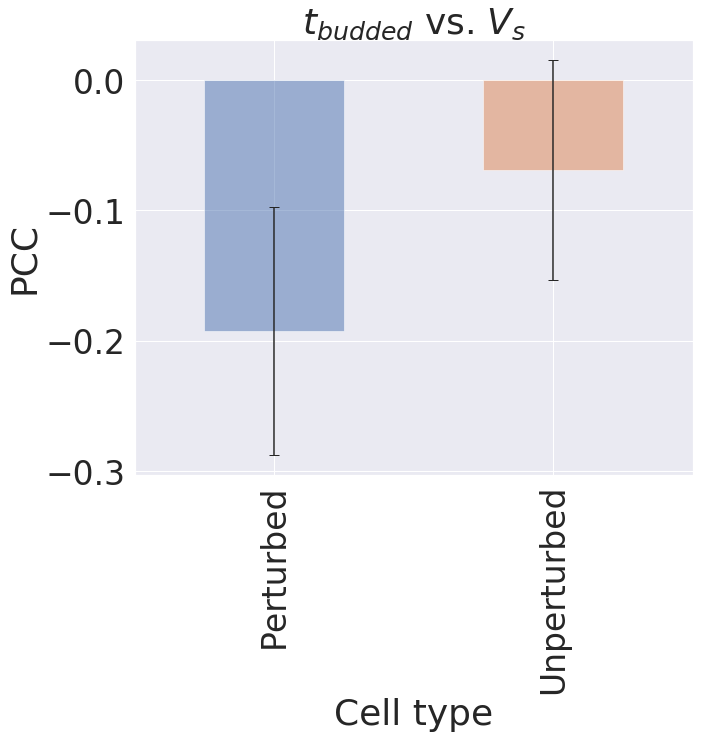

In [53]:
types = ['D']
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
x, y = '$V_{s,ell}$', '$t_{budded}$'
print x,y
vals = [[],[]]
label = []
legends = ['Perturbed', 'Unperturbed']
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label
sns.set(font_scale=3.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('$t_{budded}$ vs. $V_s$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tbudded_vs_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $V_{d,ell}$
pGAL1-WHI5 D
0.13747215902455456 0.3232786667207118
pWHI5-WHI5 D
0.15210027775205862 0.2945934058590857
['Perturbed', 'Unperturbed']


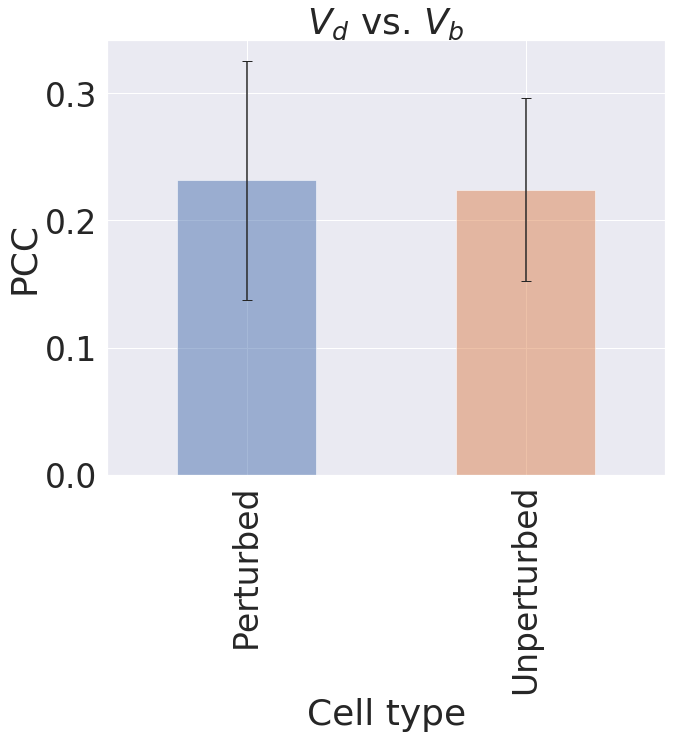

In [51]:
types = ['D']
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
x, y = '$V_{b,ell}$', '$V_{d,ell}$'
print x,y
vals = [[],[]]
label = []
legends = ['Perturbed', 'Unperturbed']
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label
sns.set(font_scale=3.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('$V_{d}$ vs. $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/vd_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

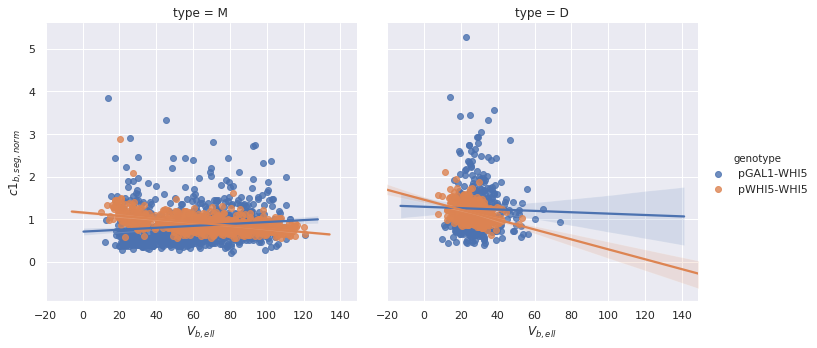

In [101]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$c1_{b,seg,norm}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c1b_Vb_full_compressed.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [64]:
df_temp=df[df.genotype=='pGAL1-WHI5']
len(df_temp[df_temp.type=='D'])

266

In [65]:
len(df[df.genotype=='pGAL1-WHI5'])

868

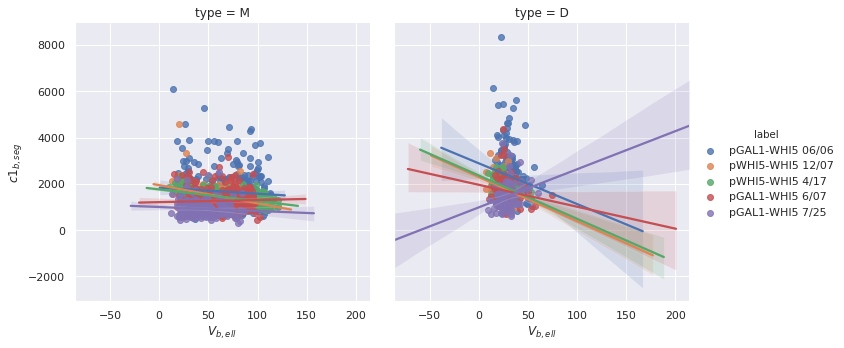

In [83]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$c1_{b,seg}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c1b_Vb_full.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [67]:
len(df3[df3.type=='D'])

88

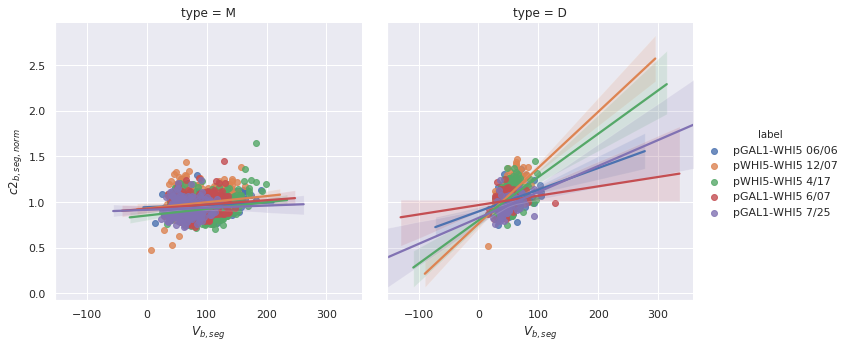

In [56]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg,norm}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c2b_Vb_norm.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

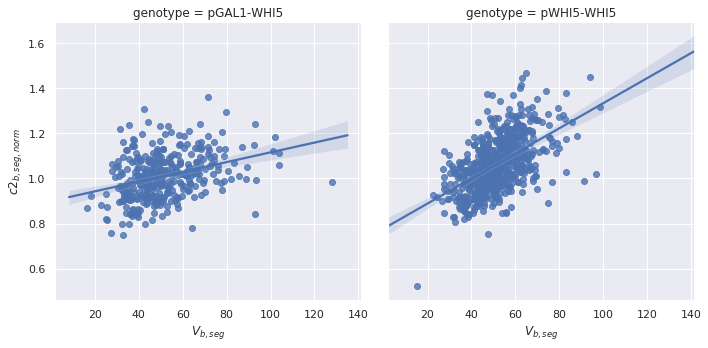

In [57]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg,norm}$', data=df[df.type=='D'],col='genotype',ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c2b_Vb_norm_compressed_daughters_only.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [89]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5', 'pGAL1-WHI5']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c2_{b,seg,norm}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,ell}$ $c2_{b,seg,norm}$
pWHI5-WHI5 D
0.04957862505024012 0.20290431525870825
pGAL1-WHI5 D
-0.027087285802011973 0.18754922618118453
pWHI5-WHI5 M
-0.276372403738056 -0.12436066153178393
pGAL1-WHI5 M
-0.16614696846762772 -0.028952664743982347
['pWHI5-WHI5 Daughters', 'pGAL1-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pGAL1-WHI5 Mothers']


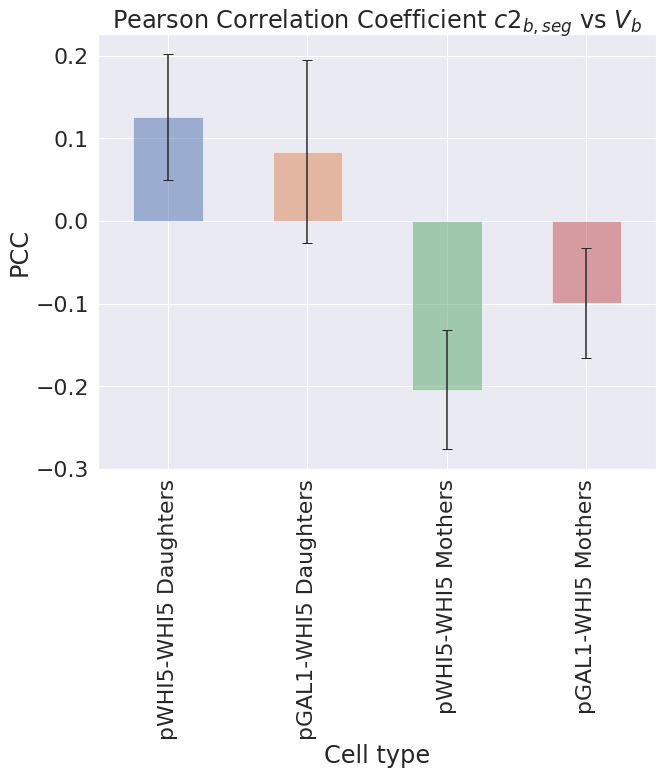

In [90]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/c2_Vb_pcc_comp_full.png',bbox_inches='tight')
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/c2b_vb_corr_full_timelapse.png',bbox_inches='tight',dpi=500)

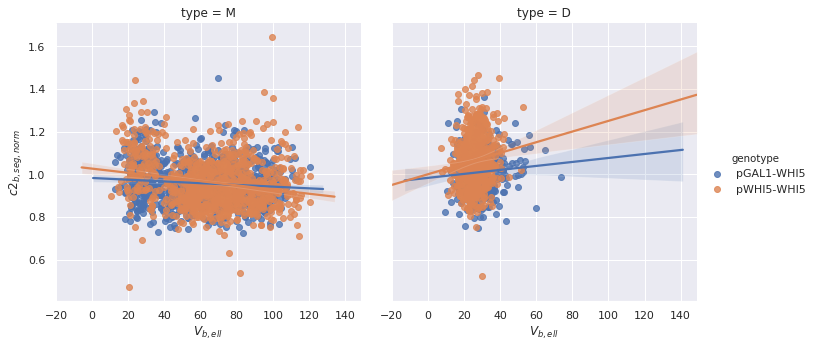

In [99]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$c2_{b,seg,norm}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
# plt.ylabel('[mCherry] (a.u.)')
# plt.xlabel('$V_b$')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c2b_Vb_norm_compressed.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [61]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
# labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
labels = ['pGAL1-WHI5', 'pWHI5-WHI5']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c2_{b,seg,norm}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]/np.mean(df[v1&v2][y])), scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df[v1&v2][x], df[v1&v2][y]/np.mean(df[v1&v2][y]))[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg,norm}$
pGAL1-WHI5 D
0.0014112673017109899 0.002803913649937222
pWHI5-WHI5 D
0.004417603027486059 0.005994611757000283
pGAL1-WHI5 M
0.00025024183458923985 0.000716347736381358
pWHI5-WHI5 M
7.828620333272112e-05 0.0008264128134537929
['pGAL1-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pGAL1-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


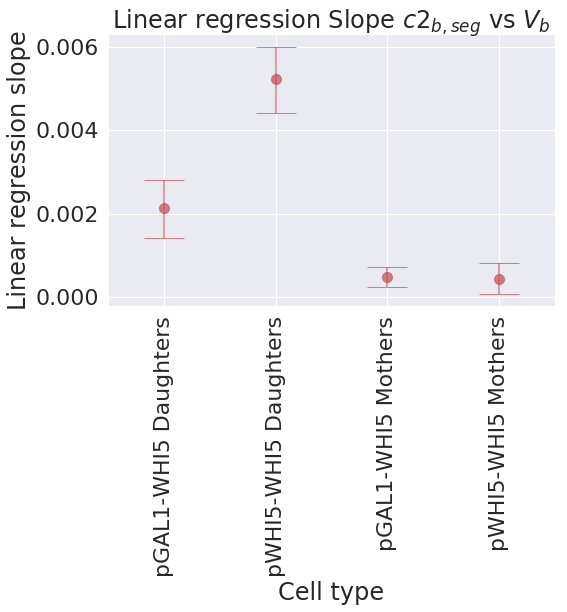

In [62]:
sns.set(font_scale=2.0)
plt.figure(figsize=(8,5))
plot = plt.errorbar(x=temp1.label,y=temp1.slope,yerr=zip(*vals[1]), fmt='.', markersize=20, capsize=20,color='r',alpha=0.7)
plt.title('Linear regression Slope $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.xlim(xmin=-0.5, xmax=3.5)
plt.ylabel('Linear regression slope')
# fig=plot.get_figure()
plt.setp(plt.gca().get_xticklabels(), rotation='vertical')
fig.savefig('./plots/c2_Vb_slope_comp_v1_norm.png',bbox_inches='tight')

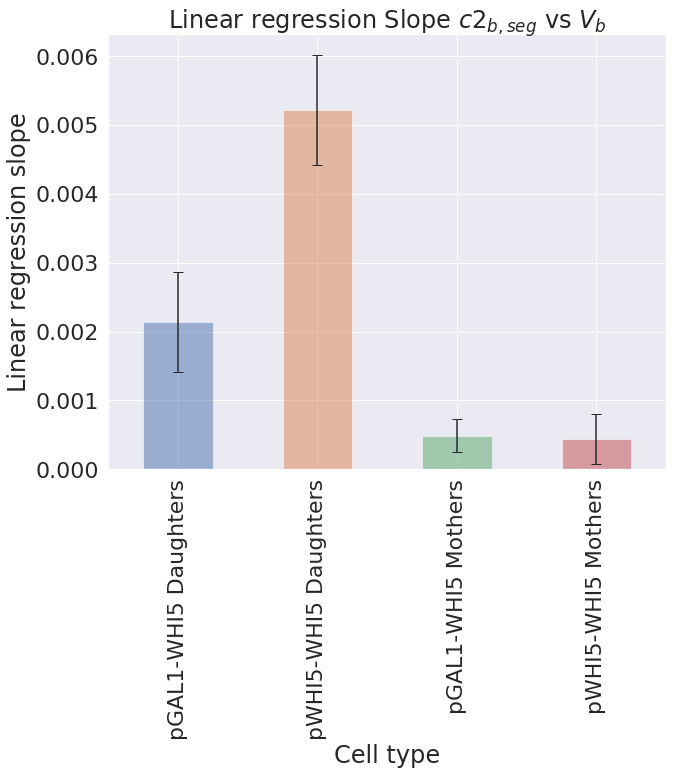

In [63]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression Slope $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Linear regression slope')
fig=plot.get_figure()
fig.savefig('./plots/c2_Vb_slope_comp_pWHI5.png',bbox_inches='tight')

In [64]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg}$
pWHI5-WHI5 4/17 D
0.38219540062262114 0.5917378820356901
pWHI5-WHI5 12/07 D
0.5277771787189095 0.6655743994092266
pWHI5-WHI5 4/17 M
0.08822710227905363 0.3237683583139009
pWHI5-WHI5 12/07 M
0.03559097306032507 0.2769752207445038
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


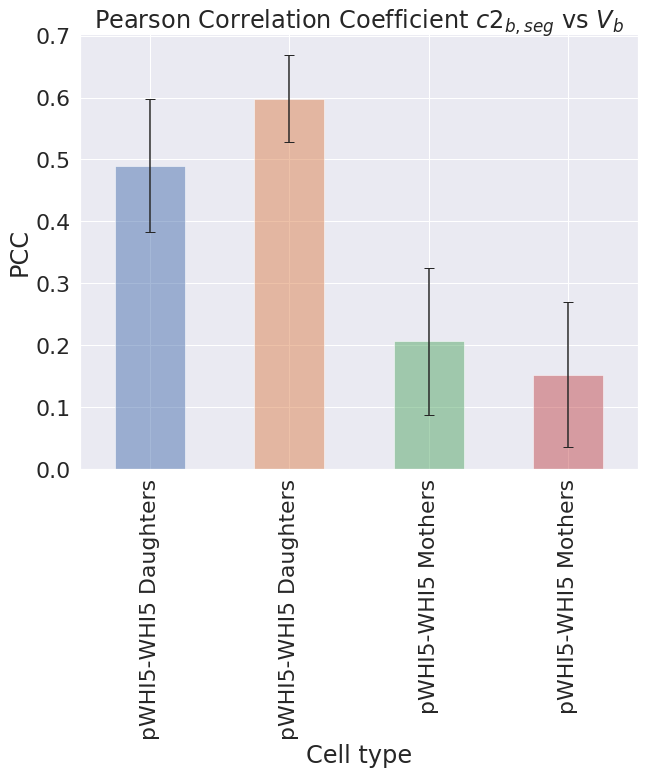

In [65]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/c2_Vb_pcc_comp_pWHI5.png',bbox_inches='tight')

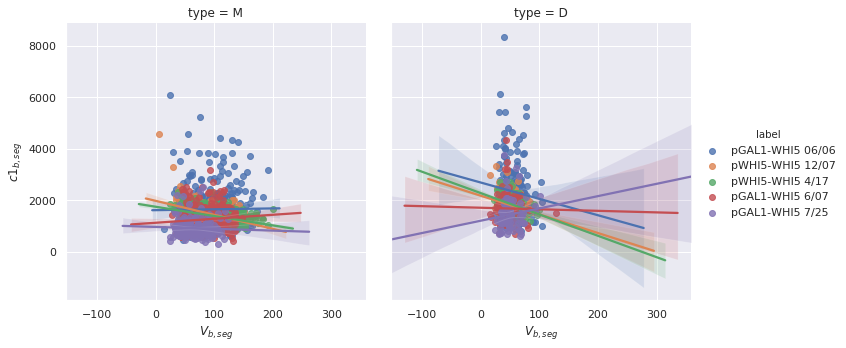

In [66]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c1b_Vb.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

# Timing correlations with concentration of proteins

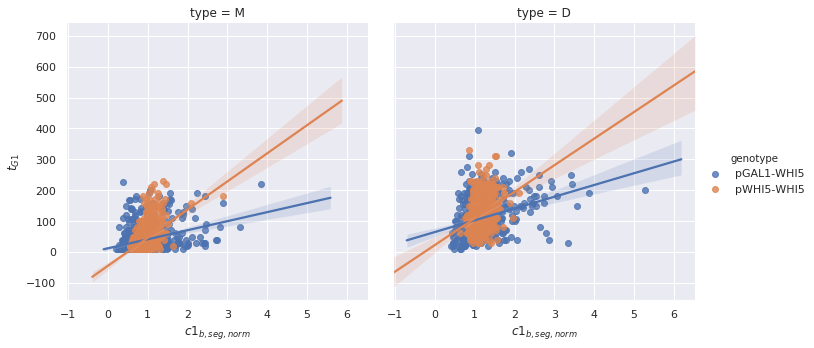

In [179]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$c1_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c1b.png', dpi=500)
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_c1b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

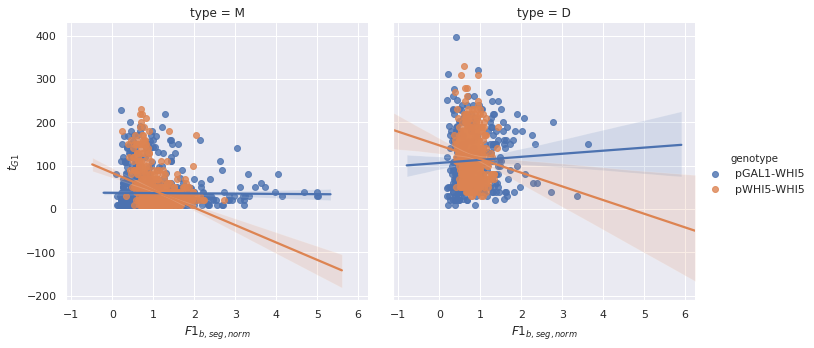

In [181]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$F1_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c1b.png', dpi=500)
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_F1b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

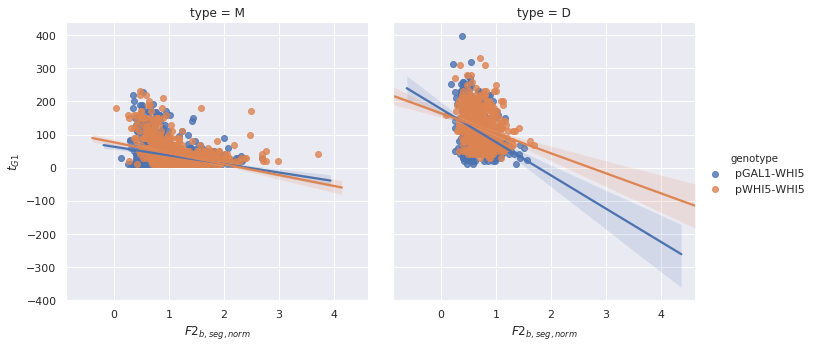

In [182]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$F2_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c1b.png', dpi=500)
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_F2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

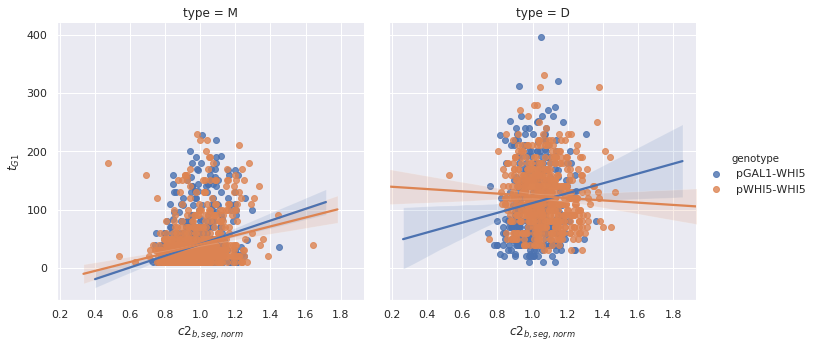

In [180]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$c2_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c1b.png', dpi=500)
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_c2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

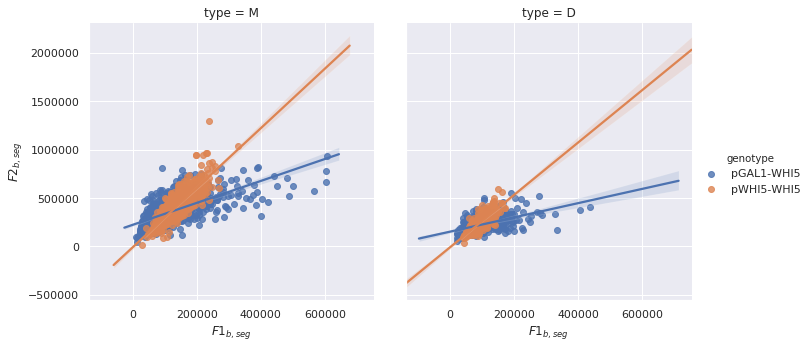

In [68]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$F1_{b,seg}$',y='$F2_{b,seg}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/F1b_F2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

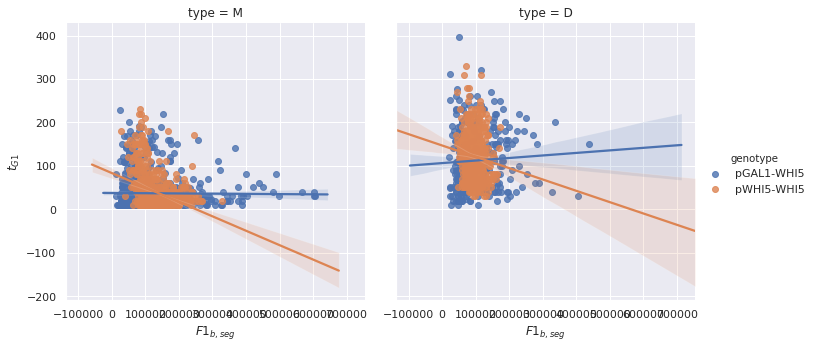

In [69]:
sns.set(font_scale=1.0)
temp_df = df
sns_plot=sns.lmplot(x='$F1_{b,seg}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_F1b.png', dpi=500)
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_F1b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

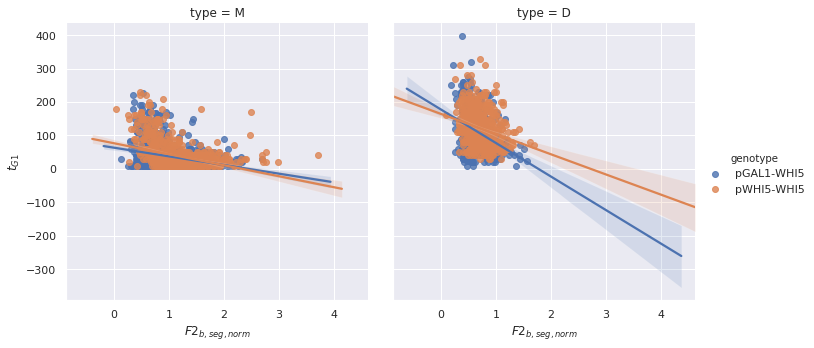

In [70]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$F2_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_F2b.png', dpi=500)
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_F2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [71]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5', 'pGAL1-WHI5']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$F1_{b,seg}$', '$t_{G1}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$F1_{b,seg}$ $t_{G1}$
pWHI5-WHI5 D
-0.19727076252621845 -0.03506542265061115
pGAL1-WHI5 D
-0.05562477557816385 0.16187170312990912
pWHI5-WHI5 M
-0.4238153507788911 -0.2981939866570623
pGAL1-WHI5 M
-0.06526353805837438 0.04703288147620367
['pWHI5-WHI5 Daughters', 'pGAL1-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pGAL1-WHI5 Mothers']


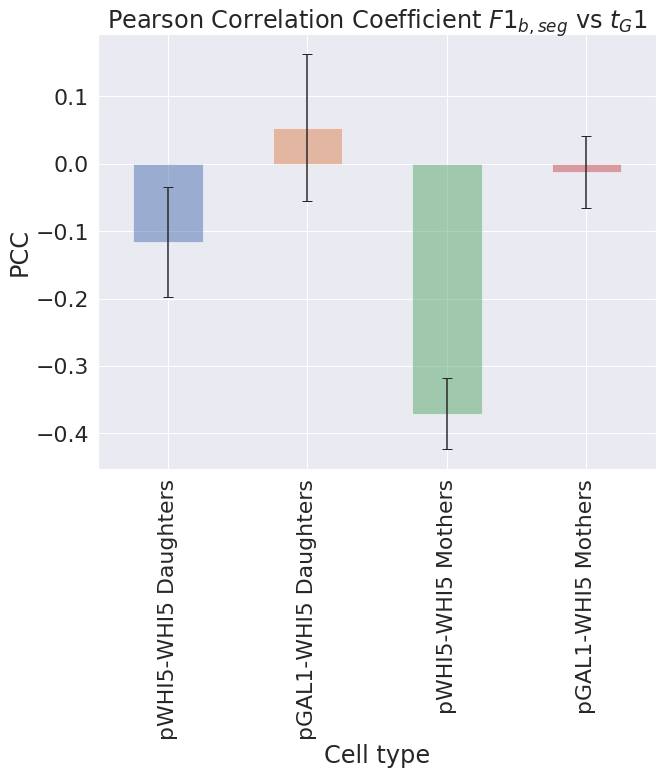

In [72]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $F1_{b,seg}$ vs $t_G1$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/F1b_tG1_pcc_comp.png',bbox_inches='tight')

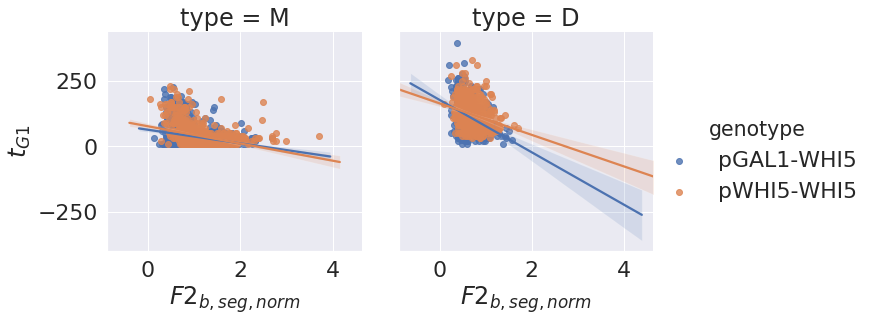

In [73]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$F2_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_F2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

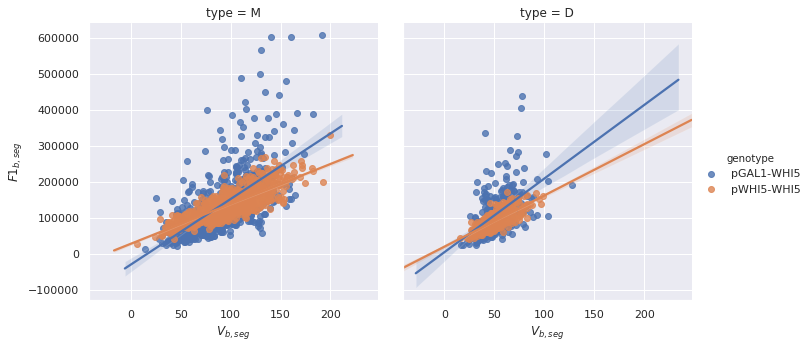

In [86]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$F1_{b,seg}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/Vb_F1b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

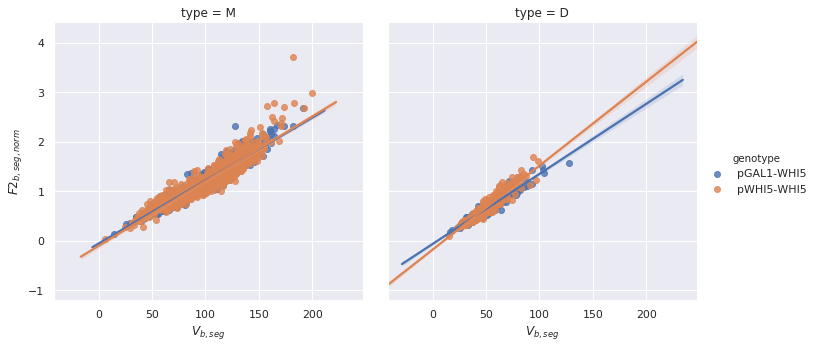

In [87]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$F2_{b,seg,norm}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/Vb_F2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

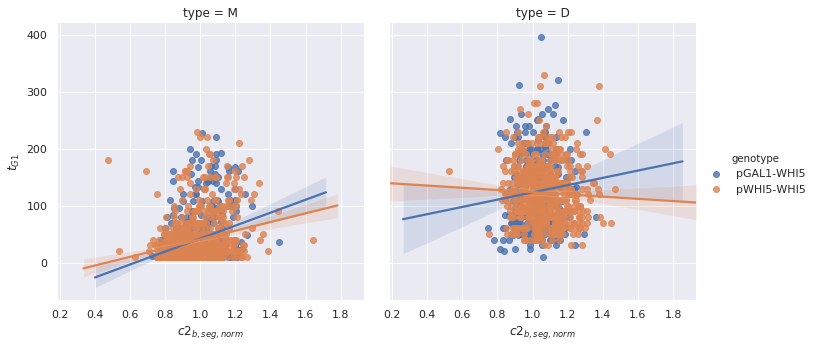

In [88]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$c2_{b,seg,norm}$',y='$t_{G1}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [89]:
np.random.randint(1,5,size=1)

array([3])

In [7]:
df.genotype.unique()

array(['pGAL1-WHI5', 'pWHI5-WHI5'], dtype=object)

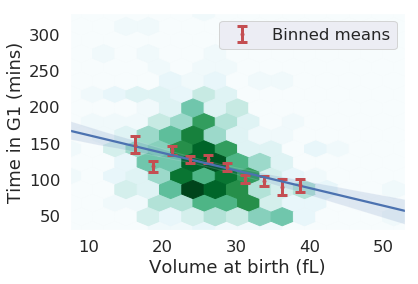

In [15]:
bp = '/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/'

y1,z1='D','pWHI5-WHI5'
temp_xv,temp_yv,save_ext='$V_{b,ell}$','$t_{G1}$','tg1_vb'
temp_xlab, temp_ylab = 'Volume at birth (fL)', 'Time in G1 (mins)'
bin_range=(15,40)


y,z,save_path=df.type==y1,df.genotype==z1,bp+y1+'_'+z1[:5]+'_'+save_ext+'.png'
fig=c.plotting_heatmap(temp_xv,temp_yv,df[y&z],bin_range,xlab=temp_xlab,ylab=temp_ylab)
fig.savefig(save_path,bbox_inches='tight',dpi=500)
plt.clf()

y1,z1='D','pGAL1-WHI5'

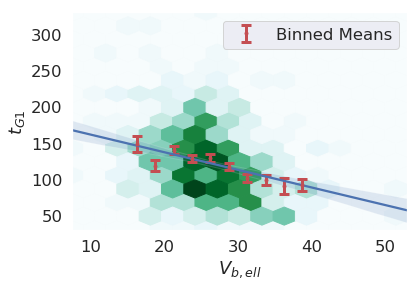

In [104]:
sns.set(font_scale=1.5)
y=df.type=='D'
z=df.genotype=='pWHI5-WHI5'
binrange=(15,40)
xv,yv='$V_{b,ell}$','$t_{G1}$'
xv1 = np.linspace(binrange[0],binrange[1],100)
bins = scipy.stats.binned_statistic(df[y&z][xv], df[y&z][yv],statistic='mean',range=binrange)
bins1 = scipy.stats.binned_statistic(df[y&z][xv], df[y&z][yv],statistic='std',range=binrange)
bins2 = scipy.stats.binned_statistic(df[y&z][xv], df[y&z][yv],statistic='count',range=binrange)
fig=plt.figure()
plt.errorbar(x=(bins.bin_edges[1:]+bins.bin_edges[:-1])/2,y=bins.statistic, yerr=bins1.statistic/np.sqrt(bins2.statistic), fmt='.',color='r',elinewidth=3,capthick=3,capsize=5,label='Binned Means')
plt.legend()
plt.hexbin(x=df[y&z][xv], y=df[y&z][yv],gridsize=15,cmap="BuGn")
sns_plot=sns.regplot(x=xv,y=yv,scatter=False, data=df[y&z],ci=95,truncate=True)
plt.xlabel(xv)
plt.ylabel(yv)
fig.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/tg1_vb_pWHI5_only.png",bbox_inches='tight',dpi=500)

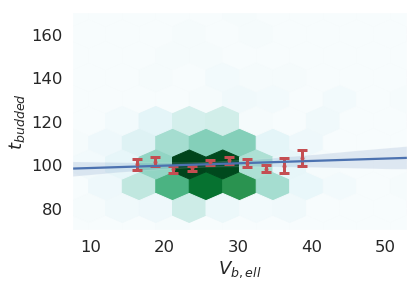

In [97]:
sns.set(font_scale=1.5)
y=df.type=='D'
z=df.genotype=='pWHI5-WHI5'
binrange=(15,40)
xv,yv='$V_{b,ell}$','$t_{budded}$'
xv1 = np.linspace(binrange[0],binrange[1],100)
bins = scipy.stats.binned_statistic(df[y&z][xv], df[y&z][yv],statistic='mean',range=binrange)
bins1 = scipy.stats.binned_statistic(df[y&z][xv], df[y&z][yv],statistic='std',range=binrange)
bins2 = scipy.stats.binned_statistic(df[y&z][xv], df[y&z][yv],statistic='count',range=binrange)
fig=plt.figure()
plt.hexbin(x=df[y&z][xv], y=df[y&z][yv],gridsize=10,cmap="BuGn")
plt.errorbar(x=(bins.bin_edges[1:]+bins.bin_edges[:-1])/2,y=bins.statistic, yerr=bins1.statistic/np.sqrt(bins2.statistic), fmt='.',color='r',elinewidth=3,capthick=3,capsize=5)
sns_plot=sns.regplot(x=xv,y=yv,scatter=False, data=df[y&z],ci=95,truncate=True)
plt.xlabel(xv)
plt.ylabel(yv)
#     plt.legend()
fig.savefig("/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/tbudded_vb_pWHI5_only.png",bbox_inches='tight',dpi=500)

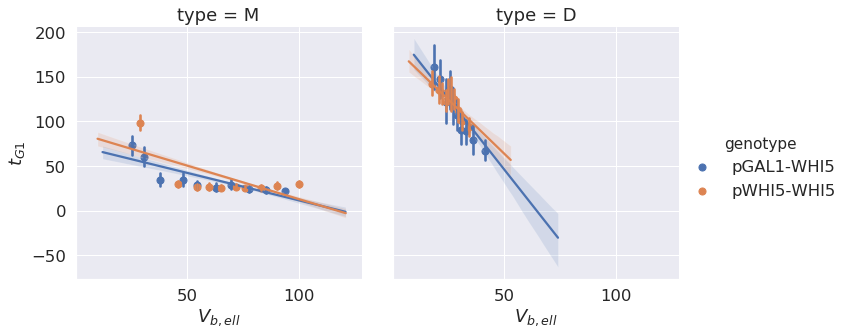

In [79]:
# sns.set(font_scale=1.0)
# sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$t_{G1}$',scatter=True,markers='o', data=df,hue='genotype', col="type",truncate=True,ci=95)
sns_plot=sns.lmplot(x='$V_{b,ell}$',y='$t_{G1}$',x_bins=10,scatter=True,markers='o', data=df,hue='genotype', col="type",truncate=True,ci=95,aspect=1)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_vb.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

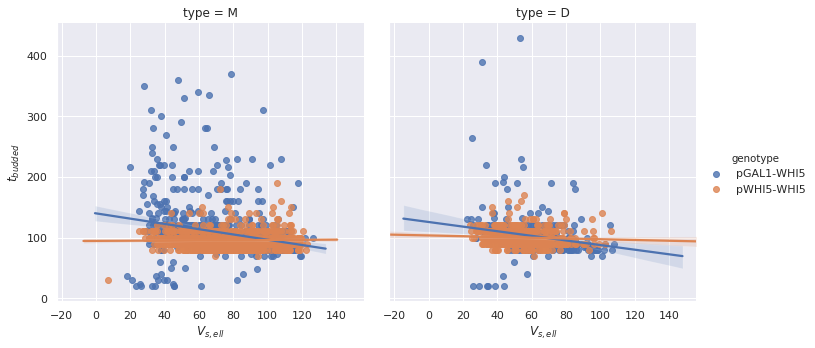

In [109]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{s,ell}$',y='$t_{budded}$', data=df,hue='genotype', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg2_vs.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [93]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c1_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,ell}$ $c1_{b,seg}$
pWHI5-WHI5 4/17 D
-0.49209980721323493 -0.2999626748130676
pWHI5-WHI5 12/07 D
-0.47754842097127176 -0.27508935071282825
pWHI5-WHI5 4/17 M
-0.5946817625461904 -0.44906254947743246
pWHI5-WHI5 12/07 M
-0.5447413619054211 -0.39023780561010496
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


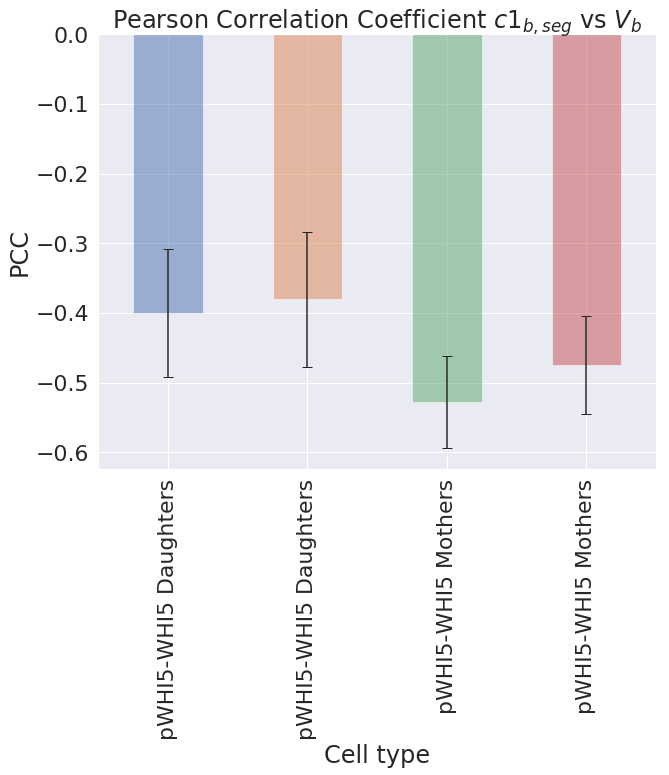

In [94]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c1_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/c1_Vb_pcc_comp_pWHI5.png',bbox_inches='tight')

In [95]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c1_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]/np.mean(df[v1&v2][y])), scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df[v1&v2][x], df[v1&v2][y]/np.mean(df[v1&v2][y]))[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,ell}$ $c1_{b,seg}$
pWHI5-WHI5 4/17 D
-0.012920454404713611 -0.0072820933815406115
pWHI5-WHI5 12/07 D
-0.014375457881322419 -0.007561410934335147
pWHI5-WHI5 4/17 M
-0.004242838928623303 -0.0030687579640191866
pWHI5-WHI5 12/07 M
-0.0068737690554598226 -0.004245973103449468
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


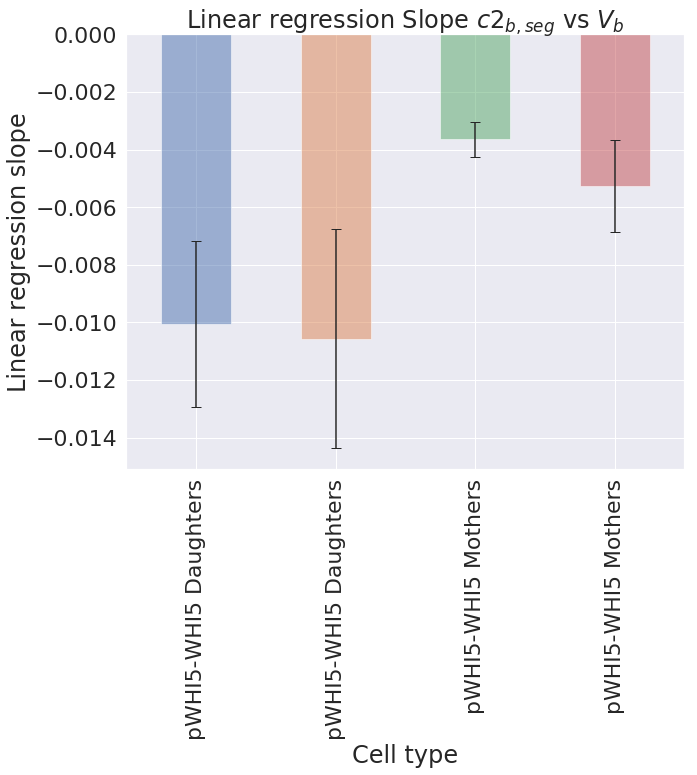

In [96]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression Slope $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Linear regression slope')
fig=plot.get_figure()
fig.savefig('./plots/c1_Vb_slope_comp_pWHI5.png',bbox_inches='tight')

In [95]:
types = ['D','M']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind in range(len(labels)):
    for ind1 in range(len(types)):
        print labels[ind], types[ind1]
        label.append(labels[ind]+' '+types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1&v2][x], df[v1&v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([z[0][0]-vals[0][-1], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['PCC', 'label'])
temp1['PCC'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg}$
pGAL1-WHI5 12/20 D


ValueError: low >= high

In [ ]:
plot = temp1.plot(x='label',y='PCC',kind='bar',yerr=zip(*vals[1]))
plt.title('Pearson Correlation Coefficient Comparison $V_{b,seg}$, $c1_{b,seg}$')
fig = plot.get_figure()
fig.savefig('./plots/PCC_comparison_c2b_vb_V1.png',bbox_inches='tight')

In [ ]:
types = ['D','M']
labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
x, y = '$V_{b,seg}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind in range(len(labels)):
    for ind1 in range(len(types)):
        print labels[ind], types[ind1]
        label.append(labels[ind]+' '+types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1&v2][x], df[v1&v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([z[0][0]-vals[0][-1], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['PCC', 'label'])
temp1['PCC'] = vals[0]
temp1['label'] = label
print label

In [ ]:
plot = temp1.plot(x='label',y='PCC',kind='bar',yerr=zip(*vals[1]))
plt.title('Pearson Correlation Coefficient Comparison $V_{b,seg}$, $c2_{b,seg}$')
fig = plot.get_figure()
fig.savefig('./plots/PCC_comparison_c2b_vb.png',bbox_inches='tight')

In [ ]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg}$', data=df,hue='label', col="type")
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c2b_Vb.png')
plt.show()

In [ ]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$F1_{b,seg}$', data=df,hue='label', col="type")
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/F1b_Vb.png')

In [ ]:
sns_plot=sns.lmplot(x='$V_{s,seg}$',y='$t_{budded}$', data=df,hue='genotype', col="type",fit_reg=True)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tbud_Vs.png', dpi=500)

In [ ]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type")
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tG1_Vb.png')

In [ ]:
sns_plot=sns.lmplot(x='$c1_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type",fit_reg=True)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tG1_c1b.png')

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$F2_{b,seg}$', data=df,hue='label', col="type")
plt.show()

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$V_{d,seg}$', data=df,hue='label', col="type")
plt.show()

In [ ]:
fig=plt.figure(figsize=[6,8])
sns.distplot(df0['$F1_{b,seg}$'], label='pGAL1-WHI5 11/14')
sns.distplot(df0['$F1_{b,seg}$'], label='pWHI5-WHI5 12/07')
plt.legend()
plt.show()

In [ ]:
i0=0
sns.lmplot(x='$V_{b,seg}$',y='$c1_{div,zproj}$', data=dfs[i0][dfs[i0]['type']=='D'],label=labels[i0])
plt.show()

In [ ]:
sns.distplot(df['$F2_{b,seg}$'])
plt.show()

In [ ]:
sns.distplot(df['$F1_{b,seg}$'])
plt.show()

In [ ]:
np.mean(df['$F1_{b,seg}$'])

In [ ]:
sns.distplot(df['$F2_{b,seg}$'])
plt.show()

In [ ]:
sns.distplot(df['$F1_{b,seg}$'])
plt.show()

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,zproj}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,zproj}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,zproj}$', data=df)
plt.show()

In [ ]:
print scipy.stats.pearsonr(df['$V_{div,seg}$'], df['$c2_{div,zproj}$'])
print scipy.stats.pearsonr(df['$V_{div,seg}$'], df['$c1_{div,zproj}$'])

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,zproj}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,seg}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,zproj}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,seg}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$F2_{k,b,zproj}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$F1_{k,b,zproj}$', data=df,hue='type')
plt.show()

In [ ]:
print scipy.stats.pearsonr(df['$c2_{b,seg}$'], df['$V_{b,seg}$'])
print scipy.stats.pearsonr(df['$c1_{b,seg}$'], df['$V_{b,seg}$'])

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{s,seg}$',y='$c2_{s,seg}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df,hue='type')
plt.show()

In [ ]:
sns.lmplot(x='$V_{s,seg}$',y='$c1_{s,seg}$', data=df,hue='type')
plt.show()

In [ ]:
fig=plt.figure(figsize=[6,6])
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,seg}$', data=df,hue='type')
plt.show()
# fig.savefig('./expt_ids'+expt_id+'C2_Vb.png')
del fig

In [ ]:
fig=plt.figure(figsize=[6,6])
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,seg}$', data=df,hue='type')
plt.show()
# fig.savefig('./expt_ids'+expt_id+'C2_Vb.png')
del fig

In [ ]:
print scipy.stats.pearsonr(df['$V_{b,seg}$'], df['$c2_{b,seg}$'])
print scipy.stats.pearsonr(df['$V_{b,seg}$'], df['$c1_{b,seg}$'])

In [ ]:
df.plot(kind='scatter',x='$V_{b,seg}$',y='$c1_{b,seg}$')
plt.show()

In [ ]:
df.plot(kind='scatter',x='$V_{b,ell}$',y='$c2_{b,ell}$')
plt.show()

In [ ]:
df.plot(kind='scatter',x='$V_{b,ell}$',y='$c1_{b,ell}$')
plt.show()

In [ ]:
df.plot(kind='scatter',x='$V_{b,ell}$',y='$t_{G1}$')
plt.show()